## Analysis with different absorber layers

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
#plt.style.use('classic')
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
import plots
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)


params = {'legend.fontsize': '23',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'axes.labelsize': '40',
         'axes.titlesize': '40'}
tick_size=4
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 10  ## Tick size
plt.rcParams['xtick.major.width'] = tick_size
plt.rcParams['xtick.minor.size'] = tick_size
plt.rcParams['xtick.minor.width'] = tick_size


plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = tick_size
plt.rcParams['ytick.minor.size'] = tick_size
plt.rcParams['ytick.minor.width'] = tick_size


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')
sampling_fraction_hcali=0.0098
sampling_fraction_hcal=0.022



Directory Plots is created


/tmp/ipykernel_1175497/3988861658.py:21: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [2]:
import pandas as pd
energies_pi_mix=[10,20,30,50,60,80]
energies_pi=[10,20,30,40,50,60,80, 100]
energies_e=[10,20,30,40,50,60,80]


##---------PIONS-----40 W + 14 Fe ------------------------
pi_means_40W_14Fe=[8.94,18.33,27.75,37.26,46.53,56.03,74.97,93.91 ]
pi_means_error_40W_14Fe=[0.119,0.082,0.074,0.077,0.067,0.090,0.092,0.116 ]
pi_stds_40W_14Fe=[ 1.76,2.62,3.14,3.72,4.19,4.54,5.39,6.23 ]
pi_stds_error_40W_14Fe=[ 0.119,0.082,0.074,0.077,0.067,0.090,0.092,0.116 ]
pi_leaks_per_40W_14Fe=[ 9.367,10.033,8.267,8.867,7.767,8.333,7.633,9.552 ]
pi_leaks_per_error_40W_14Fe=[ 0.5844,0.6066,0.5462,0.5672,0.5282,0.5486,0.5233,0.5912 ]
pi_resolutions_40W_14Fe=[ 0.19711,0.14279,0.11321,0.09973,0.08995,0.08095,0.07184,0.06634 ]
pi_resolutions_errors_40W_14Fe=[ 0.0136,0.0045,0.0027,0.0021,0.0014,0.0016,0.0012,0.0012 ]




##---------PIONS-----30 W + 24 Fe ------------------------
pi_means_30W_24Fe=[9.00,18.42,28.04,37.62,46.90,56.80,75.89,94.88 ]
pi_means_error_30W_24Fe=[0.130,0.095,0.084,0.092,0.100,0.156,0.145,0.162 ]
pi_stds_30W_24Fe=[ 1.88,2.69,3.41,3.75,4.40,5.26,5.81,6.88 ]
pi_stds_error_30W_24Fe=[ 0.130,0.095,0.084,0.092,0.100,0.156,0.145,0.162 ]
pi_leaks_per_30W_24Fe=[ 10.033,8.633,8.833,8.900,8.654,8.854,8.279,8.488 ]
pi_leaks_per_error_30W_24Fe=[ 0.6066,0.5591,0.5661,0.5684,0.6859,0.6944,0.6707,0.6882 ]
pi_resolutions_30W_24Fe=[ 0.20852,0.14612,0.12162,0.09958,0.09383,0.09256,0.07652,0.07253 ]
pi_resolutions_errors_30W_24Fe=[ 0.0148,0.0052,0.0030,0.0025,0.0021,0.0028,0.0019,0.0017 ]


##--------PIONS------25 W + 29 Fe ------------------------
pi_means_25W_29Fe=[9.12,18.55,28.11,37.98,47.71,57.42,76.94,96.90 ]
pi_means_error_25W_29Fe=[0.127,0.103,0.098,0.110,0.128,0.127,0.203,0.195 ]
pi_stds_25W_29Fe=[ 1.96,2.70,3.48,3.86,4.82,5.10,6.61,8.12 ]
pi_stds_error_25W_29Fe=[ 0.127,0.103,0.098,0.110,0.128,0.127,0.203,0.195 ]
pi_leaks_per_25W_29Fe=[ 9.050,9.200,7.950,8.500,8.750,7.773,7.931,7.659 ]
pi_leaks_per_error_25W_29Fe=[ 0.7025,0.7087,0.6551,0.6791,0.6898,0.6482,0.6597,0.6646 ]
pi_resolutions_25W_29Fe=[ 0.21498,0.14573,0.12383,0.10176,0.10100,0.08887,0.08587,0.08375 ]
pi_resolutions_errors_25W_29Fe=[ 0.0143,0.0056,0.0035,0.0029,0.0027,0.0022,0.0027,0.0020 ]


##---------PIONS-----20 W + 34 Fe ------------------------
pi_means_20W_34Fe=[9.25,18.89,28.80,38.80,49.01,58.83,79.07,99.57 ]
pi_means_error_20W_34Fe=[0.132,0.128,0.123,0.149,0.179,0.196,0.342,0.268 ]
pi_stds_20W_34Fe=[ 1.99,3.00,3.87,4.92,5.85,6.42,8.19,9.90 ]
pi_stds_error_20W_34Fe=[ 0.132,0.128,0.123,0.149,0.179,0.196,0.342,0.277 ]
pi_leaks_per_20W_34Fe=[ 9.267,8.500,10.000,7.900,8.876,7.429,9.509,8.806 ]
pi_leaks_per_error_20W_34Fe=[ 0.5810,0.5545,0.6055,0.5330,0.5678,0.5179,1.0431,1.0537 ]
pi_resolutions_20W_34Fe=[ 0.21529,0.15891,0.13438,0.12673,0.11943,0.10921,0.10362,0.09945 ]
pi_resolutions_errors_20W_34Fe=[ 0.0146,0.0069,0.0043,0.0039,0.0037,0.0034,0.0044,0.0028 ]

##---------PIONS-----0 W + 54 Fe ------------------------
pi_means_0W_54Fe=[17.91,36.23,55.08,74.51,93.46,111.96,150.57,188.97 ]
pi_means_error_0W_54Fe=[0.215,0.229,0.222,0.270,0.286,0.397,0.451,0.564 ]
pi_stds_0W_54Fe=[ 3.63,5.95,7.56,9.71,11.36,14.21,17.50,20.90 ]
pi_stds_error_0W_54Fe=[ 0.215,0.229,0.222,0.270,0.286,0.397,0.451,0.564 ]
pi_leaks_per_0W_54Fe=[ 9.800,11.050,10.750,10.800,11.450,11.250,10.550,10.900 ]
pi_leaks_per_error_0W_54Fe=[ 0.7335,0.7833,0.7715,0.7735,0.7988,0.7911,0.7636,0.7774 ]
pi_resolutions_0W_54Fe=[ 0.20277,0.16424,0.13718,0.13035,0.12156,0.12695,0.11623,0.11060 ]
pi_resolutions_errors_0W_54Fe=[ 0.0122,0.0064,0.0041,0.0037,0.0031,0.0036,0.0030,0.0030 ]


energy_cal_pi=[  8.02,   9.01,  9.99,  25,  30,     40,50,60,   80,100]
cal_pi_res=[   0.227,  0.216, 0.205, 0.115,0.108, 0.092,0.088,0.082,0.078,0.06]
cal_pi_res_err=np.multiply(cal_pi_res,0.01)

##-------ELECTRON-------40 W + 14 Fe -----------This is without the weight-------------
e_means_40W_14Fe=np.array([86.74,177.88,268.48,358.04,449.32,534.02,670.78,779.87])
e_means_error_40W_14Fe=[0.456,0.245,0.478,0.605,0.506,0.800,1.432,2.701 ]
e_stds_40W_14Fe=[ 12.92,17.72,22.19,24.52,26.79,29.73,47.68,77.45 ]
e_stds_error_40W_14Fe=[ 0.456,0.245,0.478,0.606,0.507,0.801,1.437,2.718 ]
e_leaks_per_40W_14Fe=[ 0.350,0.350,0.300,0.250,0.500,0.200,0.000,0.000 ]
e_leaks_per_error_40W_14Fe=[ 0.1325,0.1325,0.1227,0.1119,0.1585,0.1001,0.0000,0.0000 ]
e_resolutions_40W_14Fe=[ 0.14896,0.09960,0.08264,0.06850,0.05962,0.05567,0.07109,0.09931 ]
e_resolutions_errors_40W_14Fe=[ 0.0053,0.0014,0.0018,0.0017,0.0011,0.0015,0.0021,0.0035 ]

##-------ELECTRON-------25 W + 29 Fe -----------This is without the weight-------------
e_means_25W_29Fe=[86.84,176.94,269.37,359.46,449.20,535.01,673.21,779.96 ]
e_means_error_25W_29Fe=[0.290,0.568,0.338,0.719,0.826,0.697,1.120,2.478 ]
e_stds_25W_29Fe=[ 12.47,18.64,20.88,24.40,27.77,28.09,48.65,76.41 ]
e_stds_error_25W_29Fe=[ 0.291,0.569,0.338,0.720,0.828,0.699,1.126,2.498 ]
e_leaks_per_25W_29Fe=[ 0.450,0.400,0.650,0.500,0.250,0.550,0.050,0.000 ]
e_leaks_per_error_25W_29Fe=[ 0.1503,0.1417,0.1809,0.1585,0.1119,0.1663,0.0500,0.0000 ]
e_resolutions_25W_29Fe=[ 0.14357,0.10534,0.07753,0.06789,0.06183,0.05250,0.07227,0.09797 ]
e_resolutions_errors_25W_29Fe=[ 0.0034,0.0032,0.0013,0.0020,0.0018,0.0013,0.0017,0.0032 ]

### FOR NEXT TWO ELECTRON DATA 100 GEV DATA IS NOT GOOD
##-------ELECTRON------- 20W + 34 Fe -----------This is without the weight-------------
e_means_20W_34Fe=[86.95,177.01,268.50,360.68,449.70,533.58,670.56,779.87 ]
e_means_error_20W_34Fe=[0.338,0.328,0.550,0.523,0.594,0.658,1.252 ,779.87]
e_stds_20W_34Fe=[ 12.67,17.16,21.44,24.66,26.50,28.60,47.40,779.87,779.87]
e_stds_error_20W_34Fe=[ 0.339,0.328,0.551,0.524,0.595,0.659,1.258,779.87 ]
e_leaks_per_20W_34Fe=[ 0.250,0.600,0.250,0.500,0.350,0.150,0.000 ,779.87]
e_leaks_per_error_20W_34Fe=[ 0.1119,0.1737,0.1119,0.1585,0.1325,0.0867,0.0000 ,779.87]
e_resolutions_20W_34Fe=[ 0.14569,0.09695,0.07987,0.06837,0.05892,0.05361,0.07069 ,779.87]
e_resolutions_errors_20W_34Fe=[ 0.0039,0.0019,0.0021,0.0015,0.0013,0.0012,0.0019,779.87 ]


##-------ELECTRON-------30 W + 24 Fe -----------This is without the weight-------------
e_means_30W_24Fe=[86.38,178.23,267.92,358.84,448.84,534.35,670.51 ,779.87]
e_means_error_30W_24Fe=[0.344,0.578,0.360,0.585,0.445,0.799,1.429 ,779.87]
e_stds_30W_24Fe=[ 12.54,18.06,20.30,24.10,25.32,30.56,48.67 ,779.87]
e_stds_error_30W_24Fe=[ 0.344,0.578,0.360,0.586,0.445,0.802,1.435 ,779.87]
e_leaks_per_30W_24Fe=[ 0.300,0.300,0.450,0.550,0.500,0.250,0.000 ,779.87]
e_leaks_per_error_30W_24Fe=[ 0.1227,0.1227,0.1503,0.1663,0.1585,0.1119,0.0000 ,779.87]
e_resolutions_30W_24Fe=[ 0.14519,0.10132,0.07578,0.06716,0.05641,0.05720,0.07259 ,779.87]
e_resolutions_errors_30W_24Fe=[ 0.0040,0.0033,0.0013,0.0016,0.0010,0.0015,0.0021 ,779.87]

##-------ELECTRON-------0 W + 54 Fe -----------This is without the weight-------------
e_means_0W_54Fe=[236.10,476.80,715.34,957.59,1199.63,1439.14,1920.85,2391.32 ]
e_means_error_0W_54Fe=[0.621,0.770,0.916,0.467,1.157,0.806,0.952,1.545 ]
e_stds_0W_54Fe=[ 16.26,23.18,26.27,31.90,34.83,37.92,45.69,58.18 ]
e_stds_error_0W_54Fe=[ 0.621,0.770,0.916,0.467,1.157,0.806,0.953,1.629 ]
e_leaks_per_0W_54Fe=[ 2.550,2.000,1.500,1.050,1.700,1.250,0.900,1.013 ]
e_leaks_per_error_0W_54Fe=[ 0.3616,0.3194,0.2759,0.2303,0.2940,0.2516,0.2131,0.2276 ]
e_resolutions_0W_54Fe=[ 0.06888,0.04862,0.03673,0.03331,0.02903,0.02635,0.02378,0.02433 ]
e_resolutions_errors_0W_54Fe=[ 0.0026,0.0016,0.0013,0.0005,0.0010,0.0006,0.0005,0.0007 ]



### THIS IS NOT WITH THE SAMPLING FRACTION

##---------PIONS-----20 W + 34 Fe ------------------------
pi_means_20W_34Fe_nwt=[90.60,185.13,282.36,380.02,480.29,576.67,774.61,977.29 ]
pi_means_error_20W_34Fe_nwt=[0.994,0.969,0.924,1.188,1.411,1.443,2.762,2.635 ]
pi_stds_20W_34Fe_nwt=[ 18.98,29.66,37.88,47.93,57.14,62.90,79.84,100.27 ]
pi_stds_error_20W_34Fe_nwt=[ 0.994,0.969,0.924,1.188,1.411,1.443,2.762,2.635 ]


## 25W + 29 Fe  PIONS without the sampling fraction
pi_means_25W_29Fe_nwt=[89.58,181.87,275.51,372.25,467.47,562.59,753.94,949.65 ]
pi_means_error_25W_29Fe_nwt=[0.964,0.812,0.719,0.914,1.073,1.019,1.492,1.528 ]
pi_stds_25W_29Fe_nwt=[ 18.64,26.45,33.88,37.71,47.14,49.91,64.84,79.62 ]
pi_stds_error_25W_29Fe_nwt=[ 0.964,0.812,0.719,0.914,1.073,1.019,1.492,1.528 ]

pi_means_30W_24Fe_nwt=[88.12,180.50,274.76,368.80,459.87,556.41,743.76,929.70 ]
pi_means_error_30W_24Fe_nwt=[0.992,0.694,0.710,0.742,0.886,1.202,1.144,1.190 ]
pi_stds_30W_24Fe_nwt=[ 17.97,26.24,33.34,36.44,42.84,51.58,56.61,67.63 ]
pi_stds_error_30W_24Fe_nwt=[ 0.992,0.694,0.710,0.742,0.886,1.202,1.144,1.190 ]


pi_means_40W_14Fe_nwt=[87.60,179.67,271.88,365.19,456.21,549.04,734.61,920.14 ]
pi_means_error_40W_14Fe_nwt=[0.880,0.632,0.548,0.571,0.732,0.743,0.925,1.003 ]
pi_stds_40W_14Fe_nwt=[ 17.08,25.48,30.91,36.28,40.78,44.16,52.74,60.79 ]
pi_stds_error_40W_14Fe_nwt_nwt=[ 0.880,0.632,0.548,0.571,0.732,0.743,0.925,1.003 ]

pi_means_0W_54Fe_nwt=[175.35,354.94,539.95,730.12,916.04,1096.77,1475.45,1851.24 ]
pi_means_error_0W_54Fe_nwt=[1.696,1.667,1.773,2.224,2.583,3.717,4.011,5.859 ]
pi_stds_0W_54Fe_nwt=[ 34.13,57.87,74.34,95.52,111.83,139.15,170.96,205.03 ]
pi_stds_error_0W_54Fe_nwt=[ 1.696,1.667,1.773,2.224,2.583,3.717,4.011,5.861 ]
#---------------THIS IS THE NUMBER WITHOUT THE SAMPLING FRACTION-------------




def get_eh_ratio(pi_means,e_means,pi_means_error,e_means_error,layers):
    MIP_insert=0.6
    ratio_hole=np.divide(e_means,pi_means)
    error_A=(np.divide(pi_means_error,pi_means))**2 + (np.divide(e_means_error,e_means))**2
    ratio_hole_error=np.sqrt(error_A)*ratio_hole
    np.set_printoptions(precision=2)
    print('eh_ratio_{0} =['.format(layers), ratio_hole)
    np.set_printoptions(precision=4)
    print('eh_ratio_errors_{0} =['.format(layers), ratio_hole_error)


#get_eh_ratio(pi_means_40W_14Fe_nwt, e_means_40W_14Fe, pi_means_error_40W_14Fe, e_means_error_40W_14Fe,'40W_14Fe' )

#get_eh_ratio(pi_means_30W_24Fe_nwt, e_means_30W_24Fe, pi_means_error_30W_24Fe, e_means_error_30W_24Fe,'30W_24Fe' )

#get_eh_ratio(pi_means_20W_34Fe_nwt, e_means_20W_34Fe, pi_means_error_20W_34Fe, e_means_error_20W_34Fe,'20W_34Fe' )

#get_eh_ratio(pi_means_25W_29Fe_nwt, e_means_25W_29Fe, pi_means_error_25W_29Fe, e_means_error_25W_29Fe,'25W_29Fe') 

#get_eh_ratio(pi_means_0W_54Fe_nwt, e_means_0W_54Fe, pi_means_error_0W_54Fe, e_means_error_0W_54Fe,'0W_54Fe') 

## THIS IS WITH OUT ANY SAMPLING FRACTION ON PION AND ELECTRONS I EM
eh_ratio_40W_14Fe =[ 0.99, 0.99, 0.99, 0.98, 0.98 ,0.97, 0.91 ,0.85]
eh_ratio_errors_40W_14Fe =[ 0.0054, 0.0014 ,0.0018 ,0.0017, 0.0011, 0.0015, 0.002,  0.0029]
 
eh_ratio_30W_24Fe =[ 0.98, 0.99,0.98, 0.97 ,0.98, 0.96,0.9 , 0.84]
eh_ratio_errors_30W_24Fe =[0.0042, 0.0032, 0.0013, 0.0016, 0.001 , 0.0015, 0.0019, 0.8388]

eh_ratio_20W_34Fe =[ 0.96, 0.96 ,0.95, 0.95 ,0.94, 0.93, 0.87, 0.8 ]
eh_ratio_errors_20W_34Fe =[ 0.004,  0.0019, 0.002,  0.0014, 0.0013, 0.0012, 0.0017, 0.798 ]


eh_ratio_25W_29Fe =[0.97, 0.97, 0.98, 0.97 ,0.96, 0.95, 0.89, 0.82]
eh_ratio_errors_25W_29Fe =[ 0.0035, 0.0032, 0.0013, 0.002,  0.0018, 0.0013, 0.0015, 0.0026]

eh_ratio_0W_54Fe =[1.35, 1.34, 1.32, 1.31, 1.31, 1.31, 1.3,  1.29]
eh_ratio_errors_0W_54Fe =[ 0.0039, 0.0023, 0.0018 ,0.0008 ,0.0013 ,0.0009, 0.0008, 0.0009]
## 38 Layers of Tungsten

## Resolution FOR PIONS

<function matplotlib.pyplot.show(close=None, block=None)>

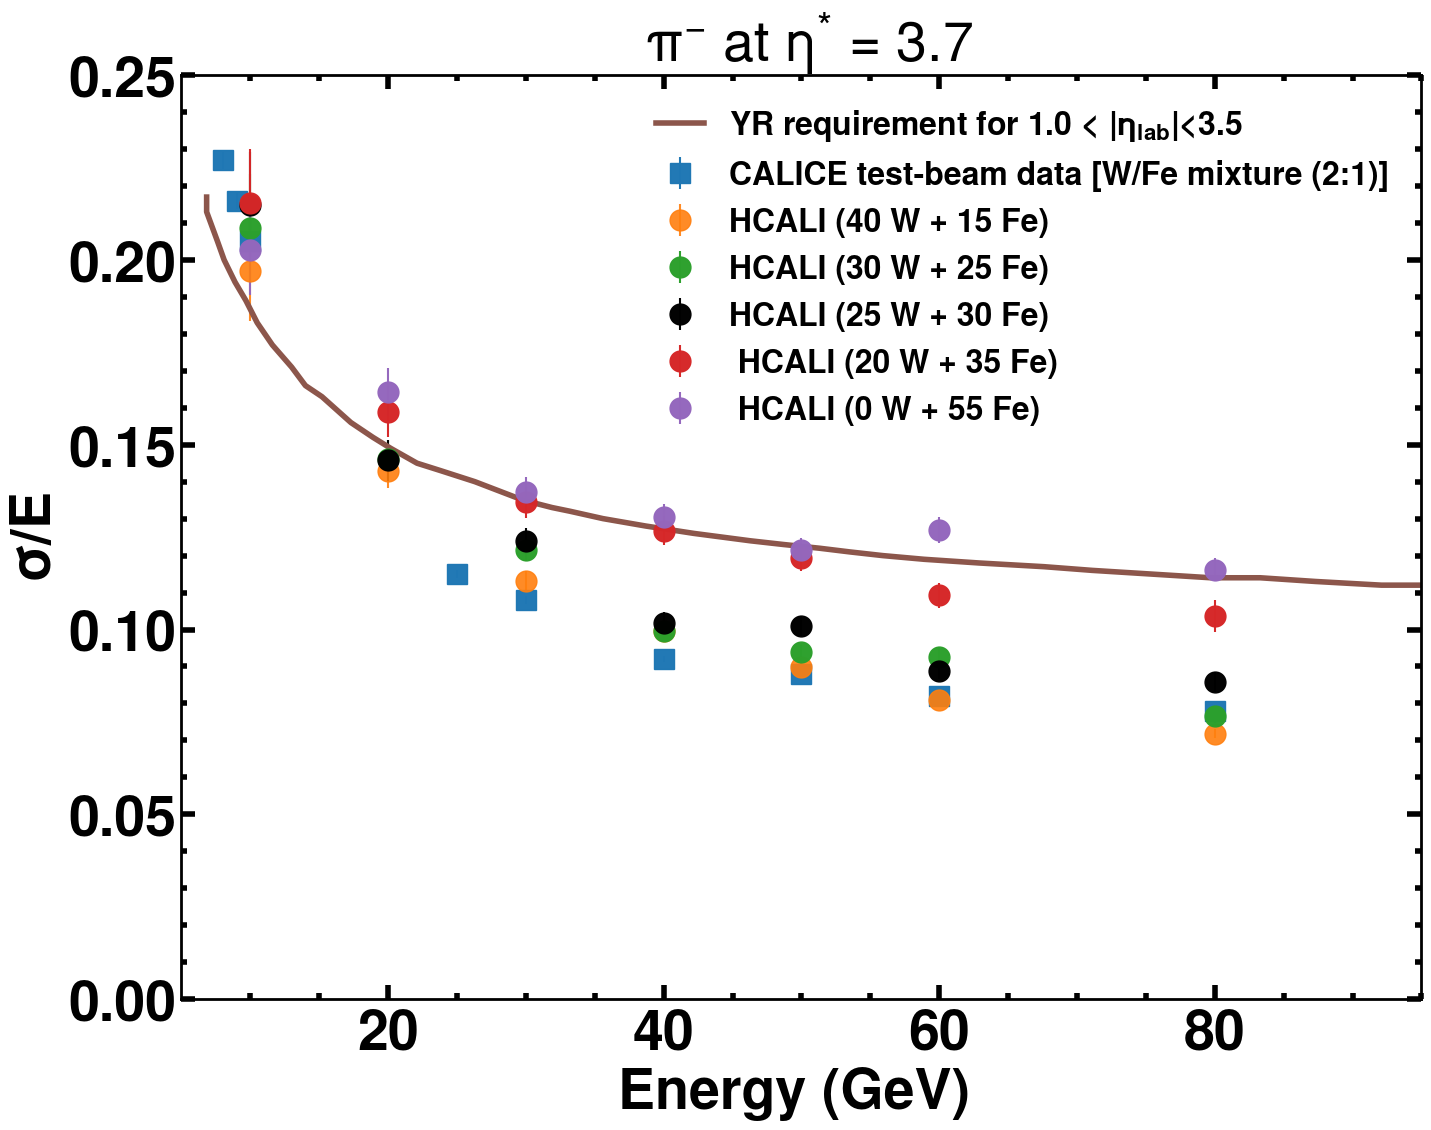

In [8]:
import seaborn as sns

palette_tab10 = sns.color_palette("tab10", 20)
palette = sns.color_palette([palette_tab10[0], palette_tab10[1], palette_tab10[3]])
#sns.palplot(palette)

path_file = '/home/bishnu/EIC/EIC_Analysis/YR_report_pion.csv'
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
df = pd.read_csv(f'{path_file}',header=None, names=['energy', 'resolution'], index_col=False)
df=df.sort_values(by=['energy'],ascending =True)
colors=['C3','C2','C6', 'C8','C5','C0','C9']
ax.errorbar(energy_cal_pi,cal_pi_res, cal_pi_res_err,marker='s',alpha=0.99,linestyle='None',\
            markersize=15,label='CALICE test-beam data [W/Fe mixture (2:1)]')

ax.set_title(' $\pi^{-}$ at $\eta^{*}$ = 3.7')
ax.errorbar(energies_pi,pi_resolutions_40W_14Fe, pi_resolutions_errors_40W_14Fe ,alpha=0.9,marker='o'
            ,markersize=15,\
            label='HCALI (40 W + 15 Fe)  ',linestyle='None')


ax.errorbar(energies_pi,pi_resolutions_30W_24Fe, pi_resolutions_errors_30W_24Fe,alpha=0.99,marker='o'
            ,markersize=15,\
            label='HCALI (30 W + 25 Fe) ',linestyle='None' )


ax.errorbar(energies_pi,pi_resolutions_25W_29Fe, pi_resolutions_errors_25W_29Fe,alpha=0.99,marker='o'
            ,markersize=15,\
            label='HCALI (25 W + 30 Fe) ',color='black',linestyle='None' )

ax.errorbar(energies_pi,pi_resolutions_20W_34Fe, pi_resolutions_errors_20W_34Fe ,alpha=0.99,marker='o',markersize=15,\
            label=' HCALI (20 W + 35 Fe)',linestyle='None')

ax.errorbar(energies_pi,pi_resolutions_0W_54Fe, pi_resolutions_errors_0W_54Fe ,alpha=0.99,marker='o',markersize=15,\
            label=' HCALI (0 W + 55 Fe)',linestyle='None')

df.plot(x='energy',y='resolution',linestyle='solid',linewidth=4,ax=ax,\
        label='YR requirement for 1.0 < $|\eta_{lab}|$<3.5')
        
ax.set_ylabel('$\sigma$/E', loc='center')
ax.set_xlabel('Energy (GeV) ', loc='center')
#ax.set_title("HCAL insert")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.25)
ax.set_xlim(5,95)
plt.legend()
plt.get_cmap('tab10', 8)
plt.show

## RESOLUTION FOR ELECTRON

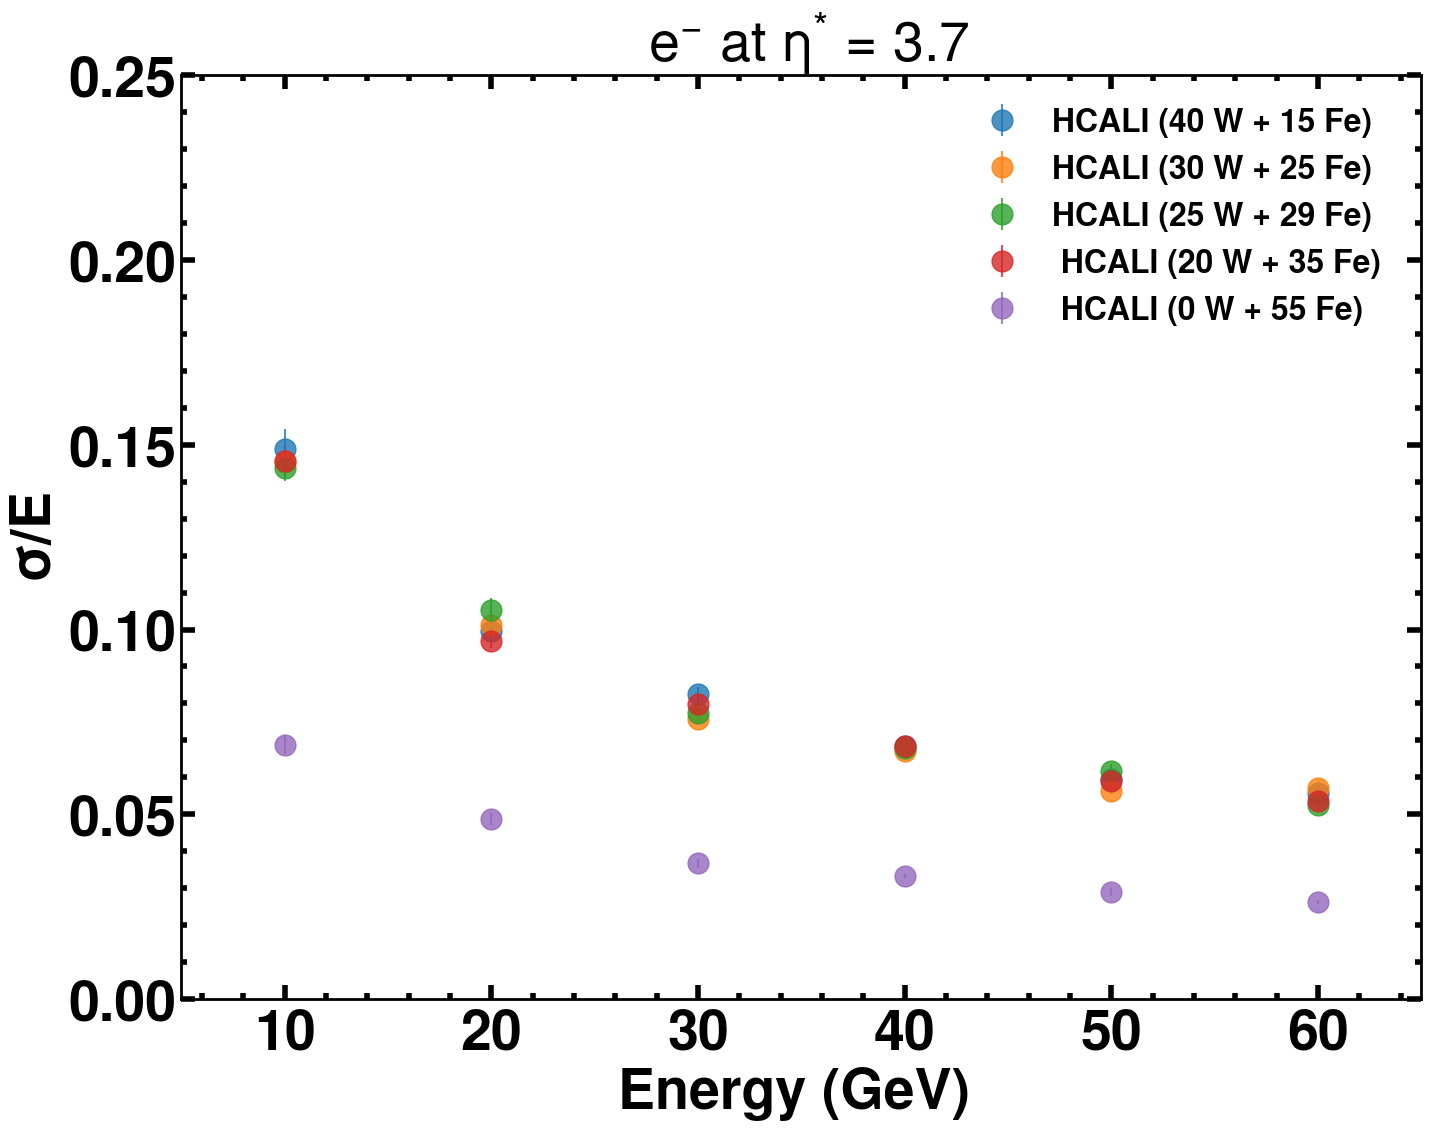

In [14]:
#path_file = '/home/bishnu/EIC/EIC_Analysis/YR_report_pion.csv'
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.set_title(' $e^{-}$ at $\eta^{*}$ = 3.7')
ax.errorbar(energies_pi,e_resolutions_40W_14Fe, e_resolutions_errors_40W_14Fe ,alpha=0.8,marker='o'
            ,markersize=15,\
            label='HCALI (40 W + 15 Fe)  ',linestyle='None')


ax.errorbar(energies_pi,e_resolutions_30W_24Fe, e_resolutions_errors_30W_24Fe,alpha=0.8,marker='o'
            ,markersize=15,\
            label='HCALI (30 W + 25 Fe) ',linestyle='None' )


ax.errorbar(energies_pi,e_resolutions_25W_29Fe, e_resolutions_errors_25W_29Fe,alpha=0.8,marker='o',markersize=15,\
            label='HCALI (25 W + 29 Fe) ',linestyle='None' )

ax.errorbar(energies_pi,e_resolutions_20W_34Fe, e_resolutions_errors_20W_34Fe ,alpha=0.8,marker='o',markersize=15,\
            label=' HCALI (20 W + 35 Fe)',linestyle='None')

ax.errorbar(energies_pi,e_resolutions_0W_54Fe, e_resolutions_errors_0W_54Fe ,alpha=0.8,marker='o',markersize=15,\
            label=' HCALI (0 W + 55 Fe)',linestyle='None')


ax.set_ylabel('$\sigma$/E', loc='center')
ax.set_xlabel('Energy (GeV) ', loc='center')
#ax.set_title("HCAL insert")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.25)
ax.set_xlim(5,65)
plt.legend(loc='upper right')

plt.show()

## Leakage PIONS

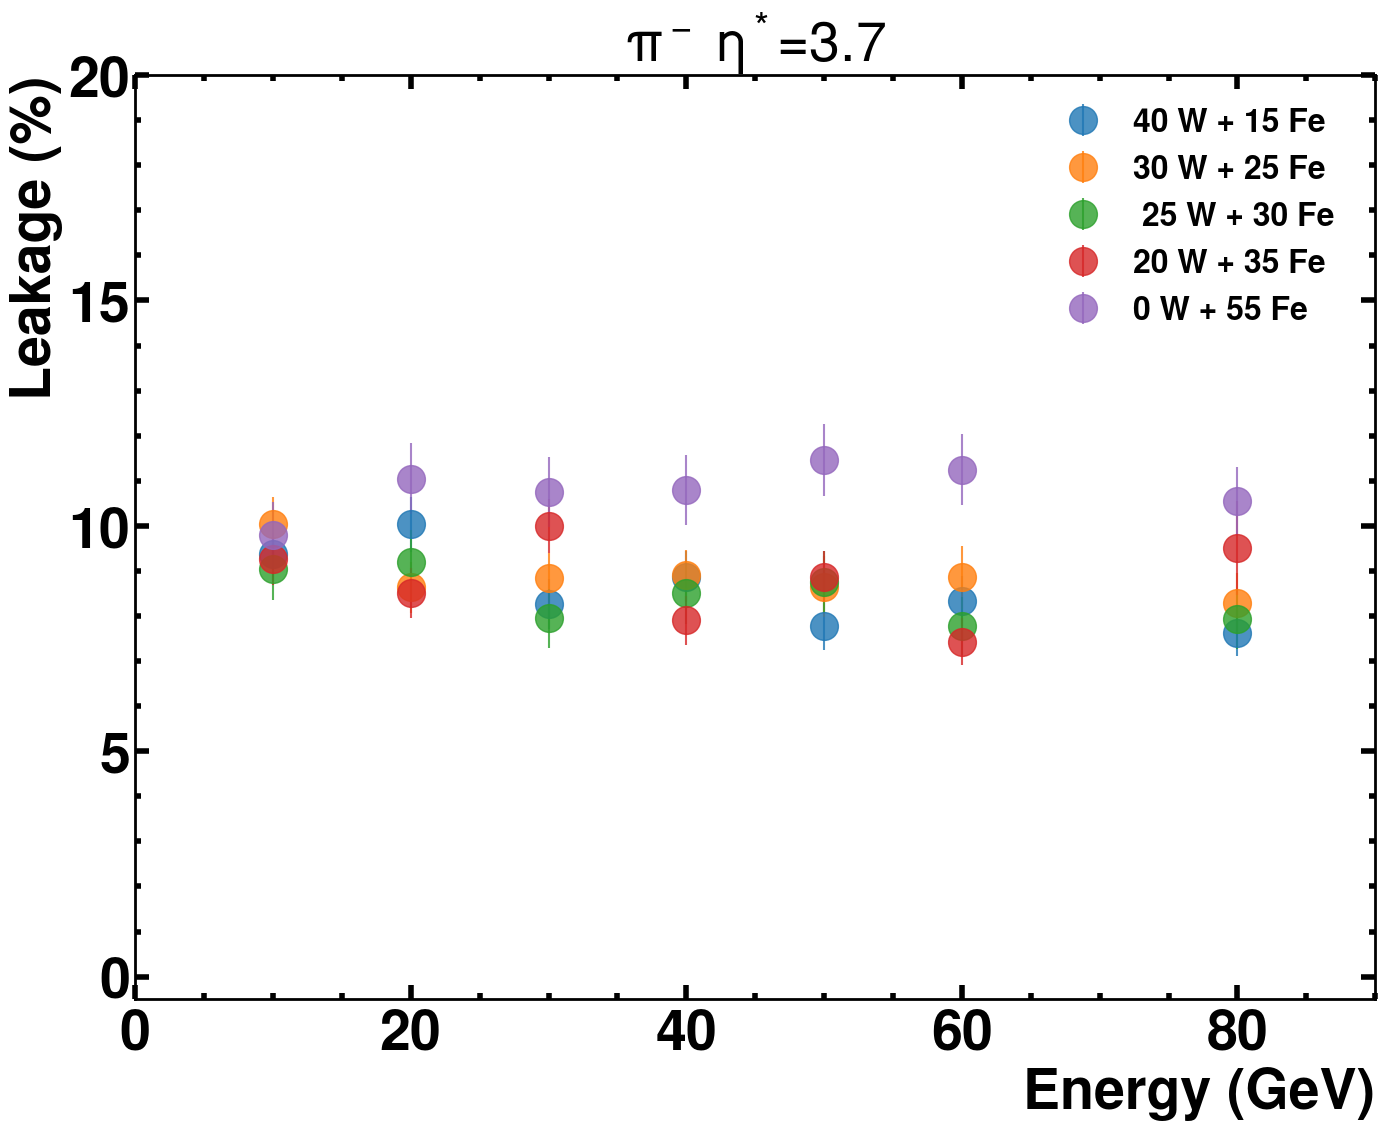

In [15]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_leaks_per_40W_14Fe, pi_leaks_per_error_40W_14Fe ,alpha=0.8,marker='o',markersize=20,\
            label='40 W + 15 Fe  ',linestyle='None')

ax.errorbar(energies_pi,pi_leaks_per_30W_24Fe, pi_leaks_per_error_30W_24Fe,alpha=0.8,marker='o',markersize=20,\
            label='30 W + 25 Fe',linestyle='None' )

ax.errorbar(energies_pi,pi_leaks_per_25W_29Fe, pi_leaks_per_error_25W_29Fe ,alpha=0.8,marker='o',markersize=20,\
            label=' 25 W + 30 Fe',linestyle='None')

ax.errorbar(energies_pi,pi_leaks_per_20W_34Fe, pi_leaks_per_error_20W_34Fe,alpha=0.8,marker='o',markersize=20,\
            label='20 W + 35 Fe',linestyle='None' )

ax.errorbar(energies_pi,pi_leaks_per_0W_54Fe, pi_leaks_per_error_0W_54Fe,alpha=0.8,marker='o',markersize=20,\
            label='0 W + 55 Fe',linestyle='None' )

ax.set_title('$\pi^-$ $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)
ax.set_xlim(0,90)

plt.legend()
plt.show()

## LEAKAGE ELECTRONS

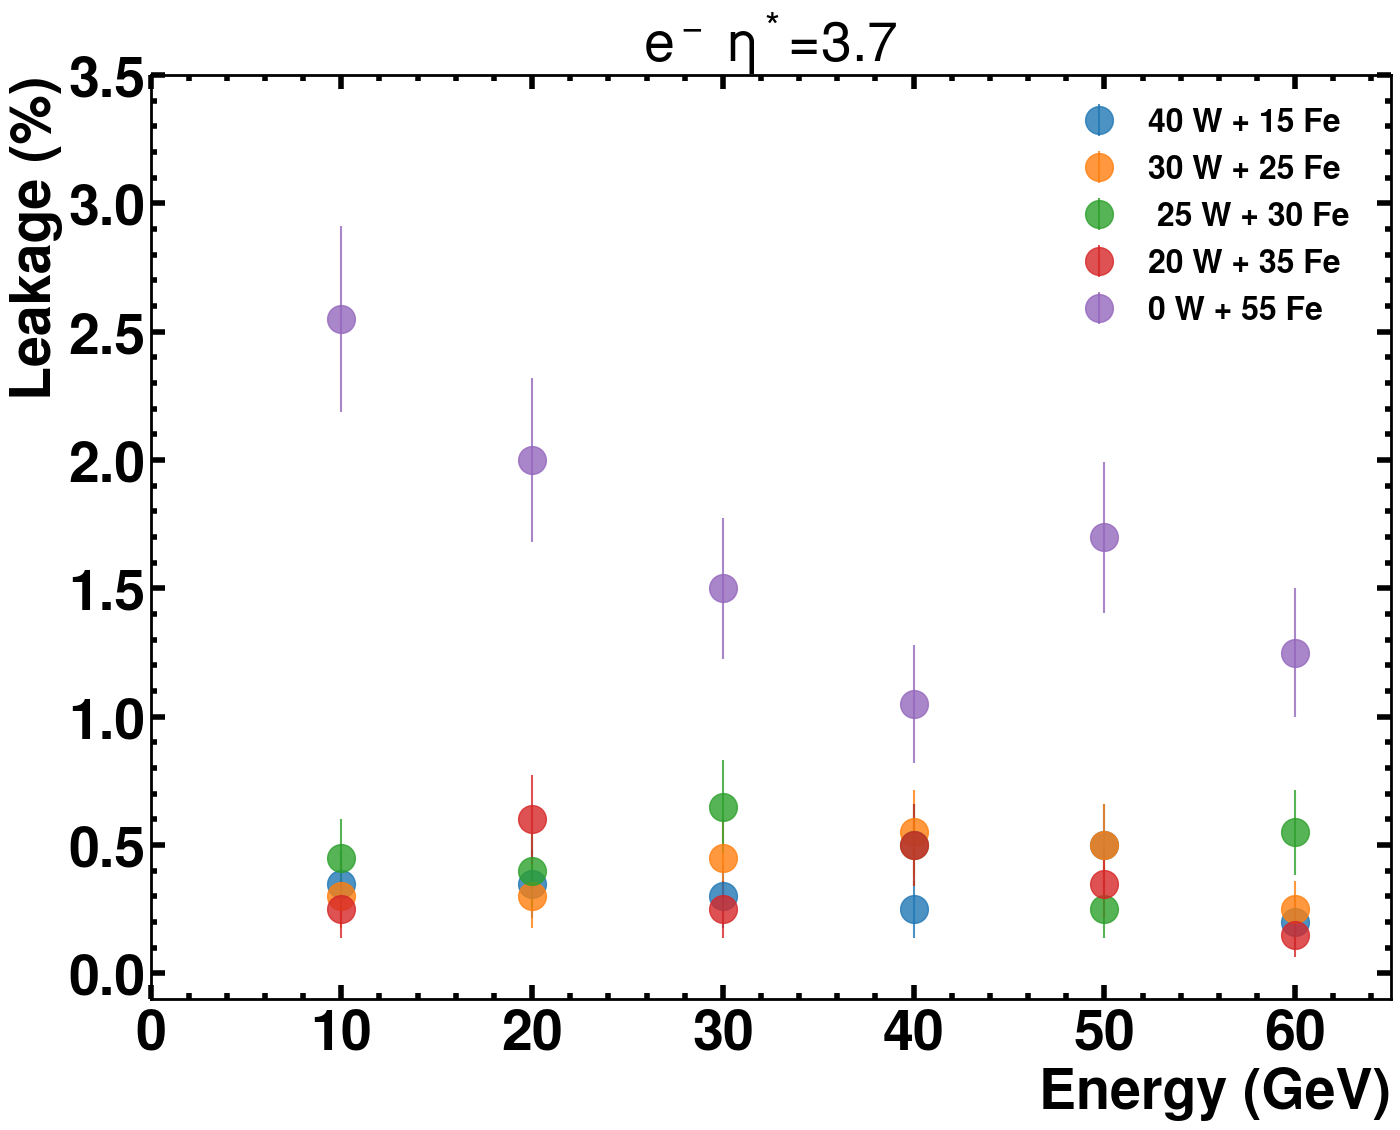

In [16]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,e_leaks_per_40W_14Fe, e_leaks_per_error_40W_14Fe ,alpha=0.8,marker='o',markersize=20,\
            label='40 W + 15 Fe  ',linestyle='None')

ax.errorbar(energies_pi,e_leaks_per_30W_24Fe, e_leaks_per_error_30W_24Fe,alpha=0.8,marker='o',markersize=20,\
            label='30 W + 25 Fe',linestyle='None' )

ax.errorbar(energies_pi,e_leaks_per_25W_29Fe, e_leaks_per_error_25W_29Fe ,alpha=0.8,marker='o',markersize=20,\
            label=' 25 W + 30 Fe',linestyle='None')

ax.errorbar(energies_pi,e_leaks_per_20W_34Fe, e_leaks_per_error_20W_34Fe,alpha=0.8,marker='o',markersize=20,\
            label='20 W + 35 Fe',linestyle='None' )

ax.errorbar(energies_pi,e_leaks_per_0W_54Fe, e_leaks_per_error_0W_54Fe,alpha=0.8,marker='o',markersize=20,\
            label='0 W + 55 Fe',linestyle='None' )

ax.set_title('$e^-$ $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.1,3.5)
ax.set_xlim(0,65)

plt.legend()
plt.show()

## Mean Value of energy deposited by pion

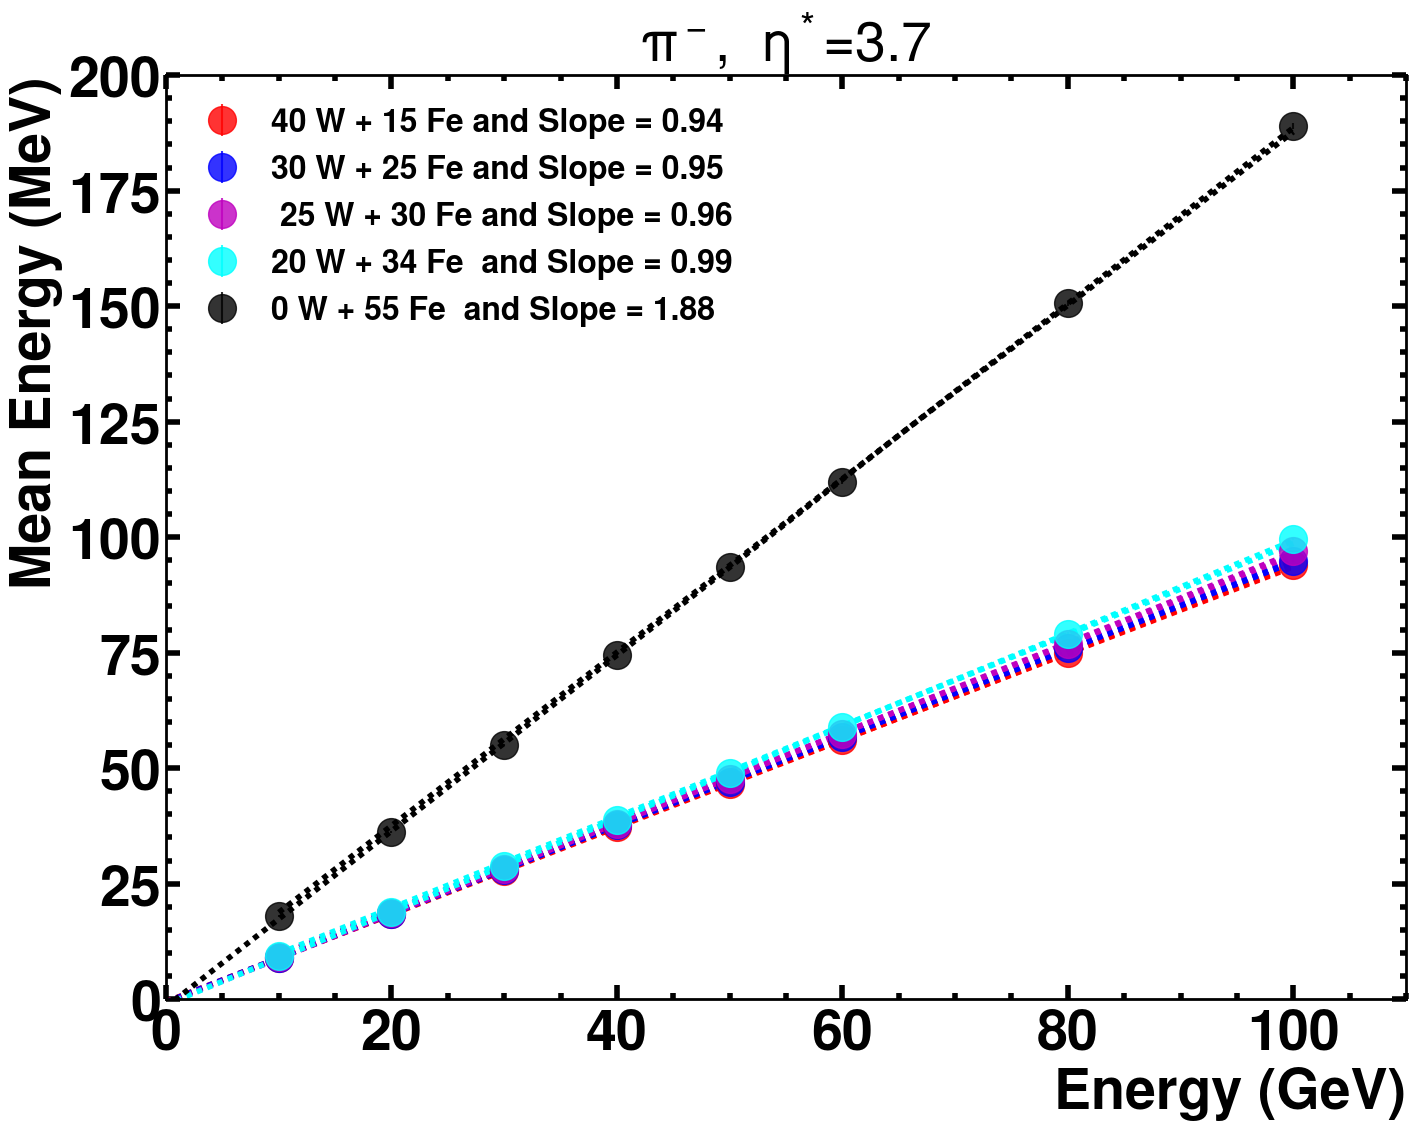

In [100]:
def fit_here(energies_pi, pi_means,col):
    popt,_popcov=curve_fit(plots.linear_fit,energies_pi,pi_means,p0=[0,25],bounds=(0,101))
    offset=popt[1]
    slope=popt[0]
    energies=np.asarray(energies_pi)
    ax.plot(energies_pi,plots.linear_fit(energies,*popt),color=col,linewidth='4', linestyle=(0,(1,1)))
    z = np.polyfit(energies, pi_means, 1)
    f = np.poly1d(z)
    ax.plot((0, max(energies)), (f(0), f(max(energies))),  color=col,linewidth='4', linestyle=(0,(1,1)))
    return slope, offset
    #plt.show()

import numpy as np

slope40, offset40=fit_here(energies_pi,pi_means_40W_14Fe, 'r')
slope30, offset30= fit_here(energies_pi,pi_means_30W_24Fe, 'b')
slope25, offset25=fit_here(energies_pi,pi_means_25W_29Fe, 'm')
slope20, offset20=fit_here(energies_pi,pi_means_20W_34Fe, 'cyan')
slope0, offset0=fit_here(energies_pi,pi_means_0W_54Fe, 'black')
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_means_40W_14Fe, pi_means_error_40W_14Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 15 Fe and Slope = {0:.2f}'.format(slope40),linestyle='None')

ax.errorbar(energies_pi,pi_means_30W_24Fe, pi_means_error_30W_24Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 25 Fe and Slope = {0:.2f}'.format(slope30),linestyle='None' )




#ax.plot(energies_pi,plots.linear_fit(energies_pi,*popt_30W_20Fe),color='m',linewidth='4',\
#        linestyle='dashed')

ax.errorbar(energies_pi,pi_means_25W_29Fe, pi_means_error_25W_29Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
 
        label=' 25 W + 30 Fe and Slope = {0:.2f}'.format(slope25),linestyle='None')

ax.errorbar(energies_pi,pi_means_20W_34Fe, pi_means_error_20W_34Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='20 W + 34 Fe  and Slope = {0:.2f}'.format(slope20),linestyle='None' )


ax.errorbar(energies_pi,pi_means_0W_54Fe, pi_means_error_0W_54Fe,color="black",alpha=0.8,marker='o',markersize=20,\
            label='0 W + 55 Fe  and Slope = {0:.2f}'.format(slope0),linestyle='None' )

ax.set_title('$\pi^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Mean Energy (MeV)")
ax.set_ylim(0,200)
ax.set_xlim(0,110)

slope40, offset40=fit_here(energies_pi,pi_means_40W_14Fe, 'r')
slope30, offset30= fit_here(energies_pi,pi_means_30W_24Fe, 'b')
slope25, offset25=fit_here(energies_pi,pi_means_25W_29Fe, 'm')
slope20, offset20=fit_here(energies_pi,pi_means_20W_34Fe, 'cyan')
slope0, offset0=fit_here(energies_pi,pi_means_0W_54Fe, 'black')

plt.legend()
#

#plt.show()

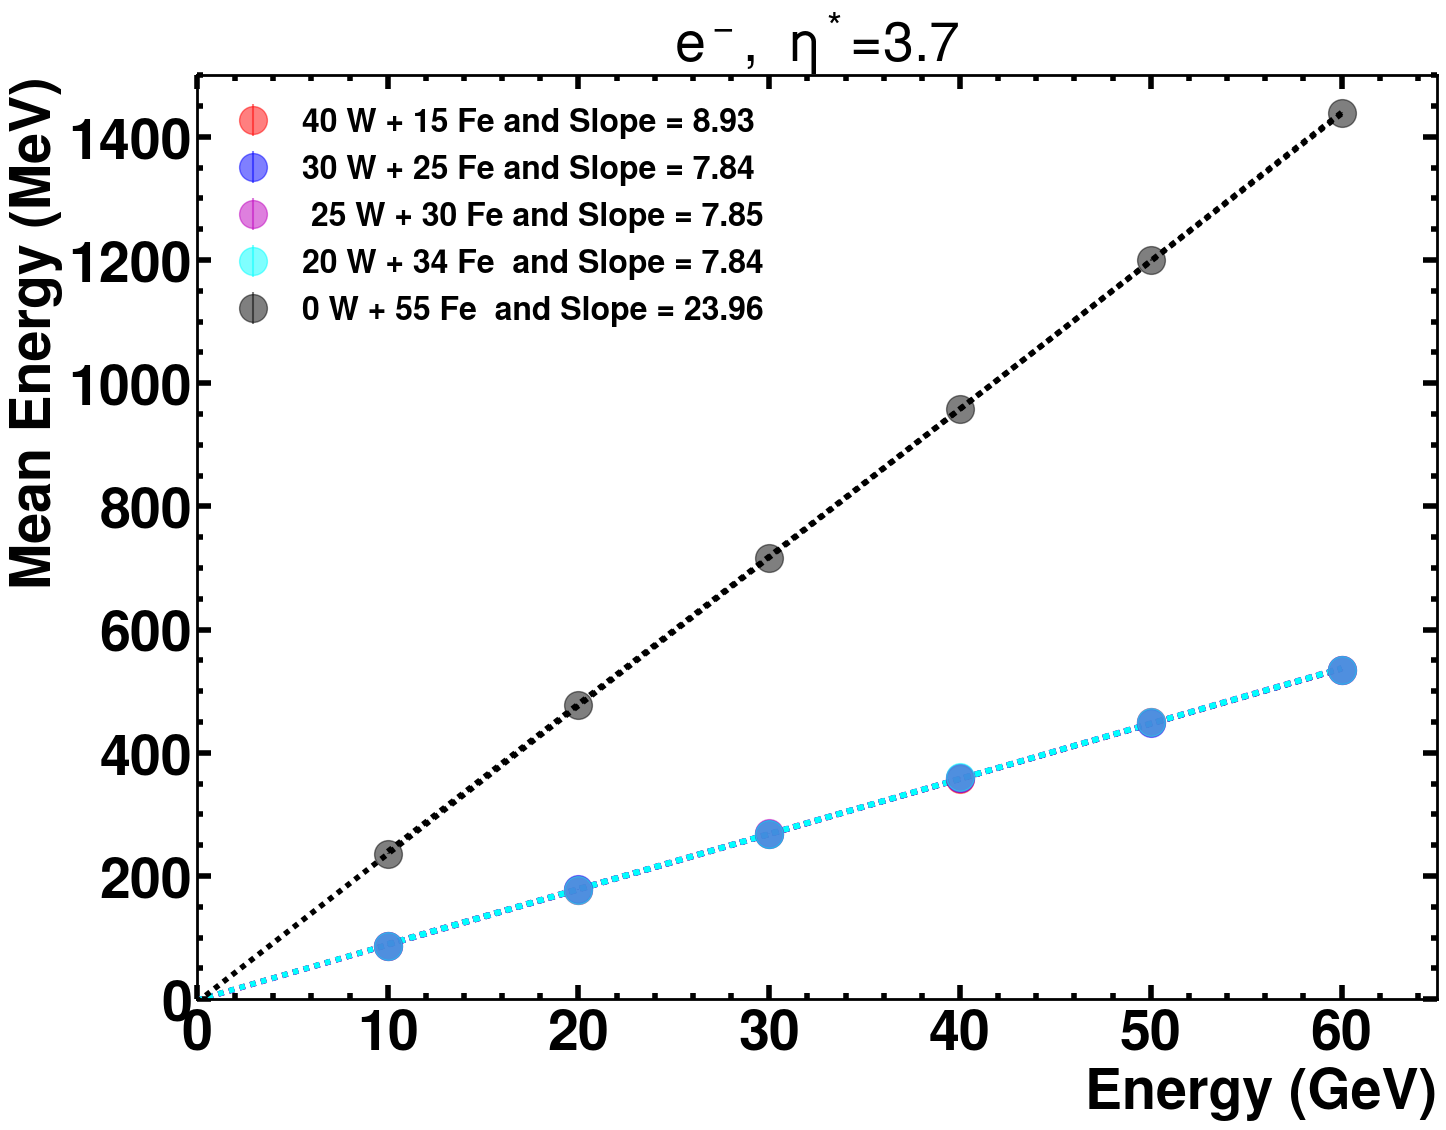

In [104]:
def fit_here(energies_pi, pi_means,col):
    popt,_popcov=curve_fit(plots.linear_fit,energies_pi,pi_means,p0=[0,25],bounds=(0,101))
    offset=popt[1]
    slope=popt[0]
    energies=np.asarray(energies_pi)
    ax.plot(energies_pi,plots.linear_fit(energies,*popt),color=col,linewidth='4', linestyle=(0,(1,1)))
    z = np.polyfit(energies, pi_means, 1)
    f = np.poly1d(z)
    ax.plot((0, max(energies)), (f(0), f(max(energies))),  color=col,linewidth='4', linestyle=(0,(1,1)))
    return slope, offset
    #plt.show()


    
    
import numpy as np
energies_pi=np.asarray(energies_pi)
e_means_40W_14Fe=np.asarray(e_means_40W_14Fe)
e_means_30W_24Fe=np.asarray(e_means_30W_24Fe)
e_means_20W_34Fe=np.asarray(e_means_20W_34Fe)
e_means_25W_29Fe=np.asarray(e_means_25W_29Fe)
e_means_0W_54Fe=np.asarray(e_means_0W_54Fe)

mask=energies_pi<65    

slope40, offset40=fit_here(energies_pi[mask],e_means_40W_14Fe[mask], 'r')
slope30, offset30= fit_here(energies_pi,e_means_30W_24Fe, 'b')
slope25, offset25=fit_here(energies_pi,e_means_25W_29Fe, 'm')
slope20, offset20=fit_here(energies_pi,e_means_20W_34Fe, 'cyan')
slope0, offset0=fit_here(energies_pi[mask],e_means_0W_54Fe[mask], 'black')

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,e_means_40W_14Fe, e_means_error_40W_14Fe ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='40 W + 15 Fe and Slope = {0:.2f}'.format(slope40),linestyle='None')

ax.errorbar(energies_pi,e_means_30W_24Fe, e_means_error_30W_24Fe,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='30 W + 25 Fe and Slope = {0:.2f}'.format(slope30),linestyle='None' )




#ax.plot(energies_pi,plots.linear_fit(energies_pi,*popt_30W_20Fe),color='m',linewidth='4',\
#        linestyle='dashed')

ax.errorbar(energies_pi,e_means_25W_29Fe, e_means_error_25W_29Fe ,alpha=0.5,color="m",marker='o',markersize=20,\
 
        label=' 25 W + 30 Fe and Slope = {0:.2f}'.format(slope25),linestyle='None')

ax.errorbar(energies_pi,e_means_20W_34Fe, e_means_error_20W_34Fe,color="cyan",alpha=0.5,marker='o',markersize=20,\
            label='20 W + 34 Fe  and Slope = {0:.2f}'.format(slope20),linestyle='None' )

ax.errorbar(energies_pi,e_means_0W_54Fe, e_means_error_0W_54Fe,color="black",alpha=0.5,marker='o',markersize=20,\
            label='0 W + 55 Fe  and Slope = {0:.2f}'.format(slope0),linestyle='None' )


ax.set_title('$e^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Mean Energy (MeV)")
ax.set_ylim(0,1500)
ax.set_xlim(0,65)

slope40, offset40=fit_here(energies_pi[mask],e_means_40W_14Fe[mask], 'r')
slope30, offset30= fit_here(energies_pi[mask],e_means_30W_24Fe[mask], 'b')
slope25, offset25=fit_here(energies_pi[mask],e_means_25W_29Fe[mask], 'm')
slope20, offset20=fit_here(energies_pi[mask],e_means_20W_34Fe[mask], 'cyan')
slope0, offset0=fit_here(energies_pi[mask],e_means_0W_54Fe[mask], 'black')
plt.legend()
#

#plt.show()


## eh ratio

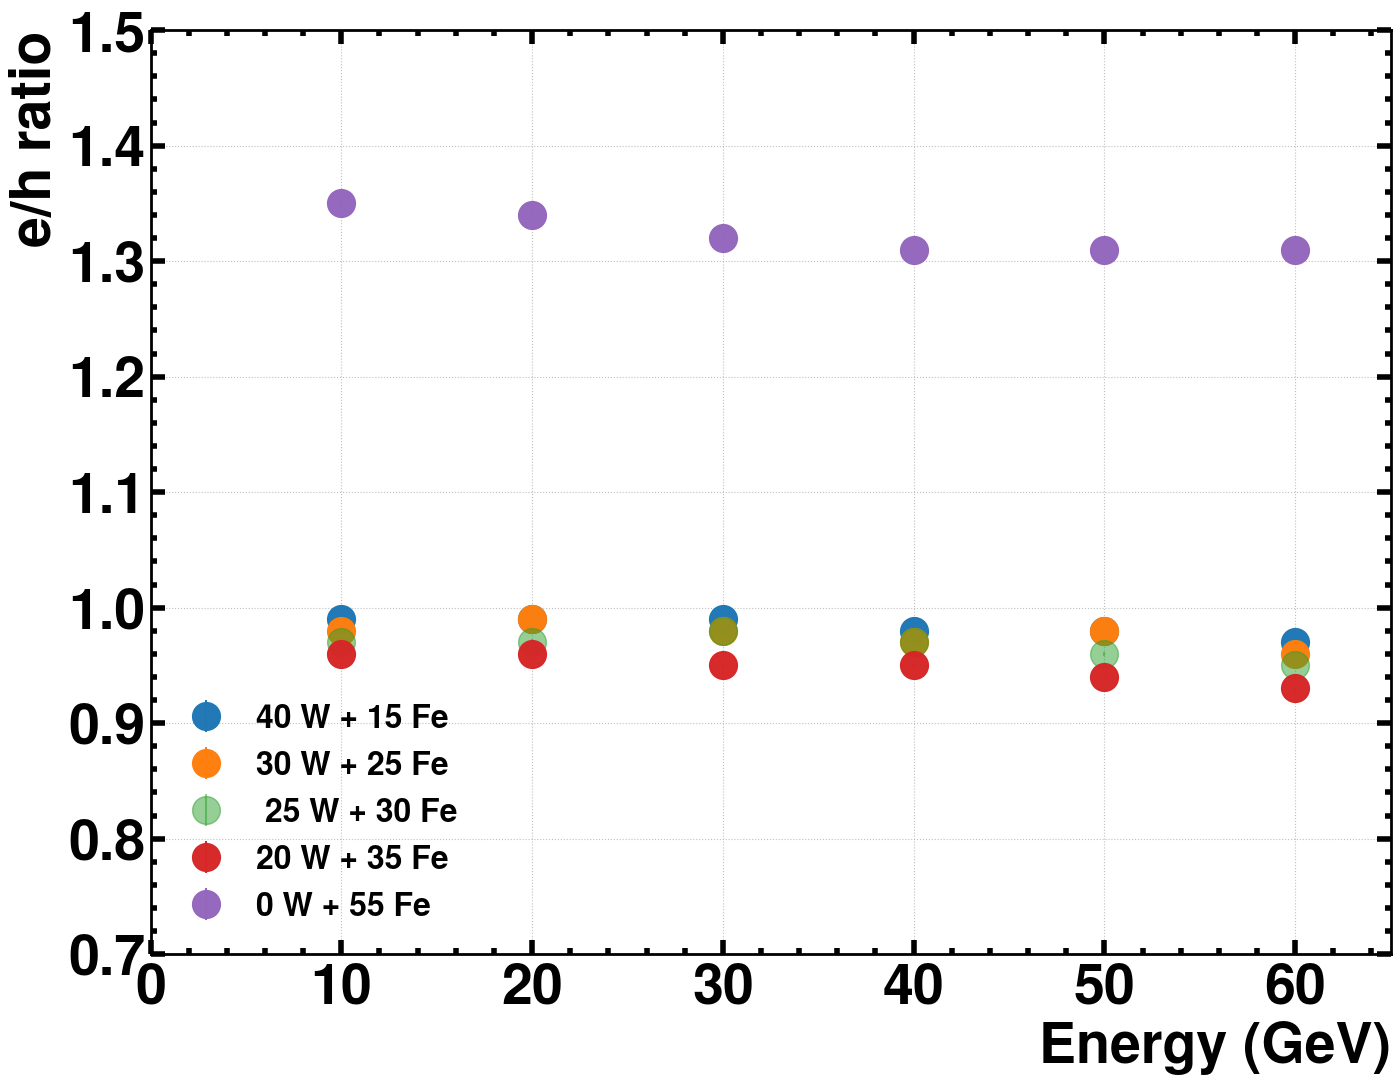

In [18]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
trans=0.99

ax.errorbar(energies_pi,eh_ratio_40W_14Fe, eh_ratio_errors_40W_14Fe ,alpha=trans,marker='o',markersize=20,\
            label='40 W + 15 Fe  ',linestyle='None')

ax.errorbar(energies_pi,eh_ratio_30W_24Fe, eh_ratio_errors_30W_24Fe,alpha=trans,marker='o',markersize=20,\
            label='30 W + 25 Fe',linestyle='None' )



ax.errorbar(energies_pi,eh_ratio_25W_29Fe, eh_ratio_errors_25W_29Fe ,alpha=0.5,marker='o',markersize=20,\
            label=' 25 W + 30 Fe',linestyle='None')

ax.errorbar(energies_pi,eh_ratio_20W_34Fe, eh_ratio_errors_20W_34Fe,alpha=trans,marker='o',markersize=20,\
            label='20 W + 35 Fe',linestyle='None' )

ax.errorbar(energies_pi,eh_ratio_0W_54Fe, eh_ratio_errors_0W_54Fe,alpha=trans,marker='o',markersize=20,\
            label='0 W + 55 Fe',linestyle='None' )
#ax.set_title('$\pi^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("e/h ratio")
ax.set_ylim(0.7,1.50)
ax.set_xlim(0,65)
ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.yaxis.set_major_locator(MultipleLocator(0.10))
plt.legend()
plt.show()

## Resolution updated calorimeter with rapdity 

In [20]:
### RESOLUTION WITH HCAL ONLY WEIGHT IS CONSIDERED BUT HCAL IS NOT CONSIDERED

pi_means_hcali=[45.71,45.98,46.62,46.93,46.98,46.31,44.54,40.79 ]
pi_means_error_hcali=[0.436,0.280,0.175,0.128,0.120,0.122,0.130,0.424 ]
pi_stds_hcali=[ 6.22,6.11,4.80,4.45,4.28,4.11,4.57,7.00 ]
pi_stds_error_hcali=[ 0.436,0.280,0.175,0.128,0.120,0.122,0.130,0.424 ]
pi_leaks_per_hcali=[ 20.100,14.400,11.200,8.650,7.750,5.150,5.500,9.850 ]
pi_leaks_per_error_hcali=[ 1.0986,0.9076,0.7891,0.6855,0.6462,0.5203,0.5386,0.7355 ]
pi_resolutions_hcali=[ 0.13606,0.13279,0.10304,0.09479,0.09102,0.08884,0.10261,0.17164 ]
pi_resolutions_errors_hcali=[ 0.0096,0.0061,0.0038,0.0027,0.0026,0.0026,0.0029,0.0105 ]


### RESOLUTION WITH HCAL + HCALI AND WEIGHT IS CONSIDERED 
pi_means_whcal=[46.57,46.79,47.91,48.67,49.21,49.25,48.85,47.96 ]
pi_means_error_whcal=[0.192,0.124,0.113,0.097,0.108,0.096,0.098,0.078 ]
pi_stds_whcal=[ 6.64,6.65,5.13,4.73,4.59,4.15,4.30,3.97 ]
pi_stds_error_whcal=[ 0.192,0.124,0.113,0.097,0.108,0.096,0.098,0.078 ]
pi_leaks_per_whcal=[ 11.200,4.800,3.350,1.900,2.100,1.700,0.900,1.500 ]
pi_leaks_per_error_whcal=[ 0.7891,0.5015,0.4161,0.3111,0.3274,0.2940,0.2131,0.2759 ]
pi_resolutions_whcal=[ 0.14250,0.14218,0.10709,0.09710,0.09335,0.08436,0.08795,0.08273 ]
pi_resolutions_errors_whcal=[ 0.0042,0.0027,0.0024,0.0020,0.0022,0.0020,0.0020,0.0016 ]



thetas=np.array([2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23])
eta=plots.get_eta(thetas)
np.set_printoptions(precision=2)
print(eta)

   

[3.93 3.9  3.8  3.7  3.6  3.5  3.4  3.3 ]


<function matplotlib.pyplot.show(close=None, block=None)>

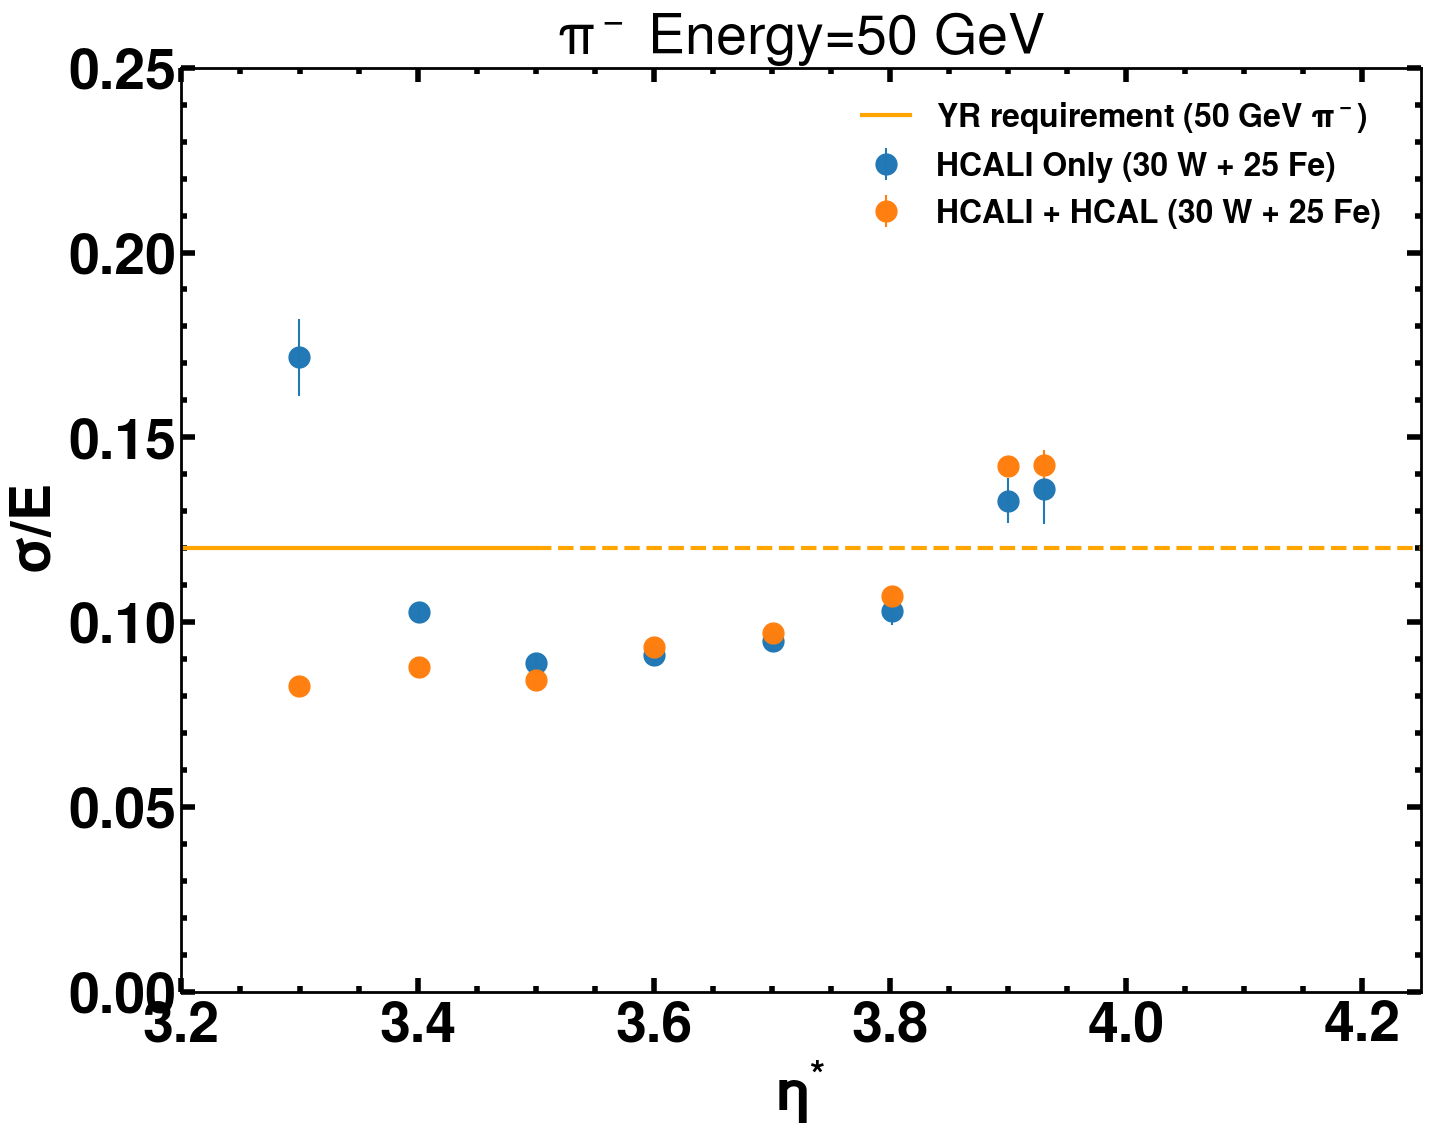

In [21]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)




ax.errorbar(eta,pi_resolutions_hcali, pi_resolutions_errors_hcali ,alpha=0.99,marker='o'
            ,markersize=15,\
            label='HCALI Only (30 W + 25 Fe)  ',linestyle='None')


ax.errorbar(eta,pi_resolutions_whcal, pi_resolutions_errors_whcal,alpha=0.99,marker='o'
            ,markersize=15,\
            label='HCALI + HCAL (30 W + 25 Fe) ',linestyle='None' )

xlim=3.2
plt.plot([xlim,3.5],[0.12,0.12], color='orange', linewidth=3,label='YR requirement (50 GeV $\pi^-$)')
plt.plot([3.5,4.25],[0.12,0.12], color='orange', linewidth=3, linestyle='dashed',)

ax.set_title('$\pi^-$ Energy=50 GeV')
ax.set_ylabel('$\sigma$/E', loc='center')
ax.set_xlabel("$\eta^{*}$ ", loc='center')
#ax.set_title("HCAL insert")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.25)
ax.set_xlim(xlim,4.25)
plt.legend()

plt.show

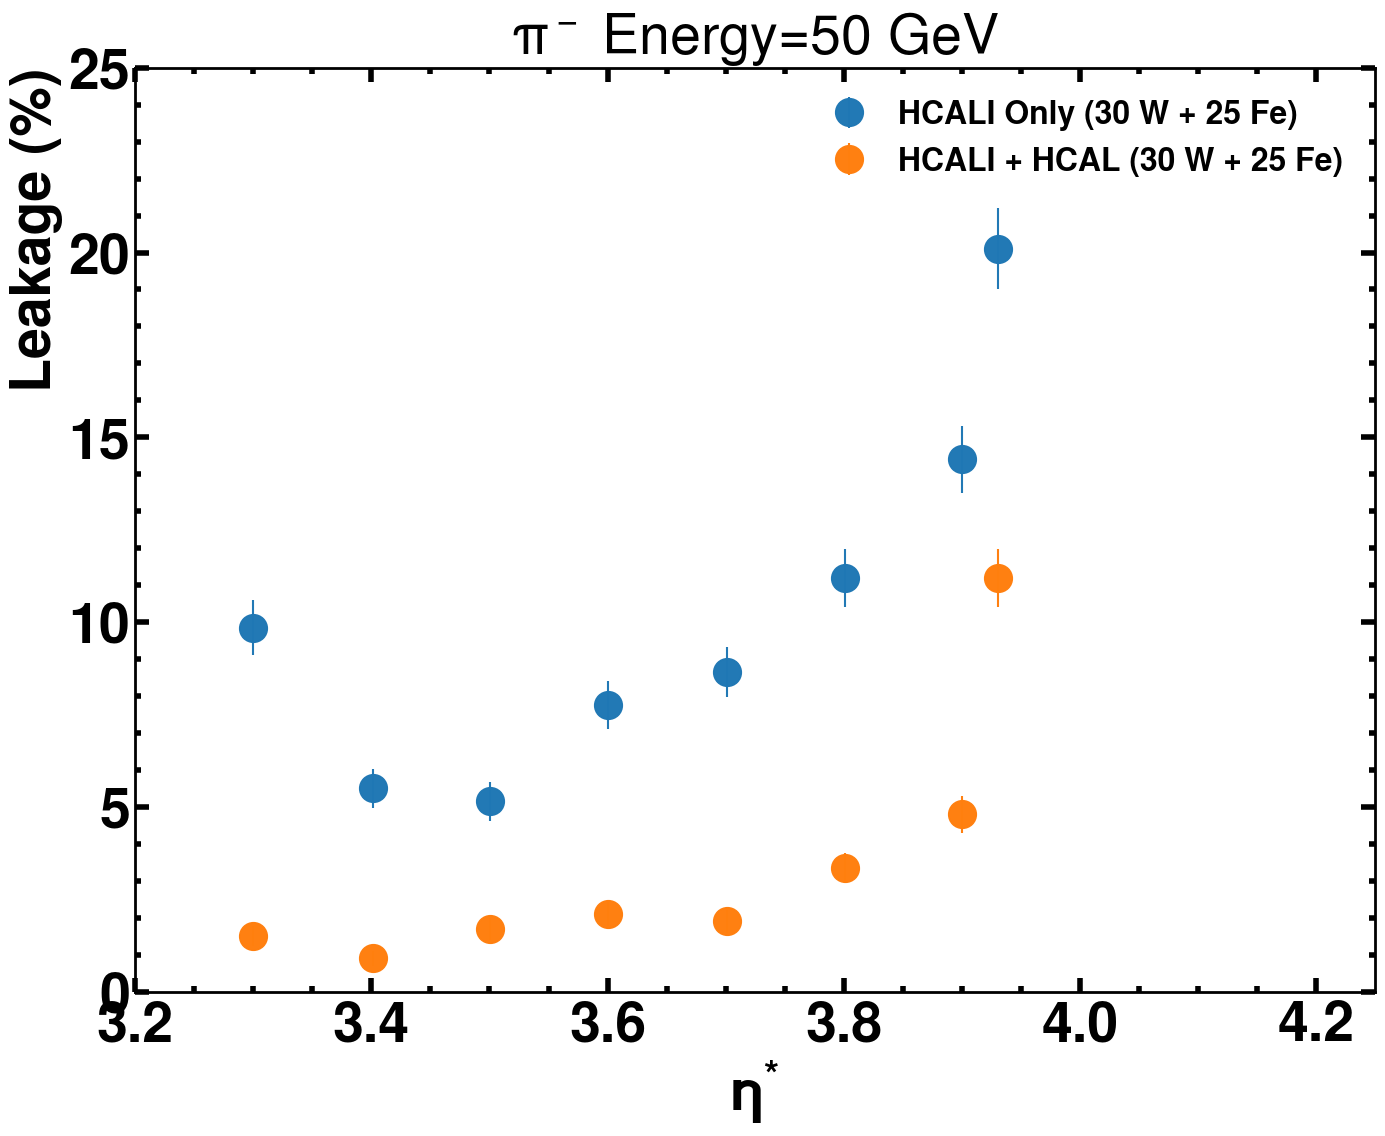

In [22]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)


ax.errorbar(eta,pi_leaks_per_hcali, pi_leaks_per_error_hcali,alpha=0.99,marker='o',markersize=20,\
            label='HCALI Only (30 W + 25 Fe)',linestyle='None' )

ax.errorbar(eta,pi_leaks_per_whcal, pi_leaks_per_error_whcal,alpha=0.99,marker='o',markersize=20,\
            label='HCALI + HCAL (30 W + 25 Fe)',linestyle='None' )


ax.set_title('$\pi^-$ Energy=50 GeV')
ax.set_xlabel("$\eta^{*}$ ", loc='center')
ax.set_ylabel("Leakage (%)")
ax.set_ylim(0,25)
ax.set_xlim(xlim,4.25)
plt.legend()
plt.show()

## Parameters with different layers in W and Fe 
## These are old ones

In [15]:
energies_pi=[10,20,30,50,60,80]

#W (30 layers)  + Fe (20 layers) FTFP_BERT_HP physics list
pi_means_30W_20Fe=[88.79,182.90,277.38,467.77,565.21,749.59 ]
pi_means_error_30W_20Fe=[1.429,0.654,0.770,0.754,1.077,1.896 ]
pi_stds_30W_20Fe=[ 17.67,25.75,32.21,44.24,49.74,60.47 ]
pi_stds_error_30W_20Fe=[ 1.429,0.654,0.770,0.754,1.077,1.896 ]
pi_leaks_per_30W_20Fe=[ 10.600,9.640,10.620,9.480,10.400,8.509 ]
pi_leaks_per_error_30W_20Fe=[ 1.0828,0.4598,0.4847,0.4556,1.0715,0.9613 ]
pi_resolutions_30W_20Fe=[ 0.19898,0.14081,0.11610,0.09457,0.08800,0.08067 ]
pi_resolutions_errors_30W_20Fe=[ 0.0164,0.0036,0.0028,0.0016,0.0019,0.0025 ]
    
    
e_means_30W_20Fe=[86.46,177.56,267.74,450.64,533.19,669.40 ]
e_means_error_30W_20Fe=[0.486,0.520,0.866,0.577,0.827,2.009 ]
e_stds_30W_20Fe=[ 13.43,18.52,21.87,28.12,31.54,48.54 ]
e_stds_error_30W_20Fe=[ 0.486,0.520,0.867,0.578,0.828,2.016 ]
e_leaks_per_30W_20Fe=[ 1.200,1.240,1.200,0.960,0.600,0.100 ]
e_leaks_per_error_30W_20Fe=[ 0.3485,0.1585,0.3485,0.1392,0.2457,0.1000 ]
e_resolutions_30W_20Fe=[ 0.15538,0.10431,0.08169,0.06241,0.05916,0.07252 ]
e_resolutions_errors_30W_20Fe=[ 0.0057,0.0029,0.0032,0.0013,0.0016,0.0030 ]

### 20 W + 30 Fe 
pi_means_20W_30Fe=[90.34,188.30,285.80,484.33,584.45,786.12 ]
pi_means_error_20W_30Fe=[1.322,1.129,1.339,1.702,1.907,2.434 ]
pi_stds_20W_30Fe=[ 20.03,29.81,38.68,50.54,62.53,79.72 ]
pi_stds_error_20W_30Fe=[ 1.322,1.129,1.339,1.702,1.907,2.434 ]
pi_leaks_per_20W_30Fe=[ 10.000,8.667,10.200,8.533,10.200,7.402 ]
pi_leaks_per_error_20W_30Fe=[ 0.8563,0.7924,0.8657,0.7858,0.8657,0.7314 ]
pi_resolutions_20W_30Fe=[ 0.22176,0.15830,0.13534,0.10435,0.10699,0.10141 ]
pi_resolutions_errors_20W_30Fe=[ 0.0150,0.0061,0.0047,0.0035,0.0033,0.0031 ]

e_means_20W_30Fe=[87.23,176.71,269.48,451.80,535.34,670.47 ]
e_means_error_20W_30Fe=[0.568,0.647,0.898,1.091,0.569,1.387 ]
e_stds_20W_30Fe=[ 13.67,19.90,23.73,28.14,31.37,47.32 ]
e_stds_error_20W_30Fe=[ 0.569,0.649,0.900,1.091,0.570,1.390 ]
e_leaks_per_20W_30Fe=[ 1.067,0.333,0.533,0.800,0.200,0.000 ]
e_leaks_per_error_20W_30Fe=[ 0.2681,0.1493,0.1891,0.2319,0.1156,0.0000 ]
e_resolutions_20W_30Fe=[ 0.15668,0.11259,0.08805,0.06228,0.05860,0.07058 ]
e_resolutions_errors_20W_30Fe=[ 0.0066,0.0037,0.0034,0.0024,0.0011,0.0021 ]


### 40 W + 10 Fe 
pi_means_40W_10Fe=[88.29,180.64,274.00,460.84,556.56,747.30 ]
pi_means_error_40W_10Fe=[1.287,0.874,0.833,0.995,1.096,1.349 ]
pi_stds_40W_10Fe=[ 17.61,24.38,30.93,40.72,43.02,56.77 ]
pi_stds_error_40W_10Fe=[ 1.287,0.874,0.833,0.995,1.096,1.349 ]
pi_leaks_per_40W_10Fe=[ 10.333,10.467,9.800,9.667,11.267,10.133 ]
pi_leaks_per_error_40W_10Fe=[ 0.8718,0.8780,0.8470,0.8407,0.9142,0.8626 ]
pi_resolutions_40W_10Fe=[ 0.19942,0.13498,0.11287,0.08836,0.07729,0.07596 ]
pi_resolutions_errors_40W_10Fe=[ 0.0149,0.0049,0.0031,0.0022,0.0020,0.0018 ]

e_means_40W_10Fe=[86.93,176.92,270.16,449.40,535.10,673.29 ]
e_means_error_40W_10Fe=[0.417,0.375,0.843,0.602,0.947,1.607 ]
e_stds_40W_10Fe=[ 13.02,19.71,21.64,29.29,30.48,48.21 ]
e_stds_error_40W_10Fe=[ 0.417,0.375,0.843,0.602,0.947,1.614 ]
e_leaks_per_40W_10Fe=[ 1.133,0.533,1.200,1.133,0.667,0.000 ]
e_leaks_per_error_40W_10Fe=[ 0.2764,0.1891,0.2845,0.2764,0.2115,0.0000 ]
e_resolutions_40W_10Fe=[ 0.14981,0.11141,0.08009,0.06519,0.05697,0.07160 ]
e_resolutions_errors_40W_10Fe=[ 0.0049,0.0021,0.0031,0.0013,0.0018,0.0024 ]

### 10 W + 40 Fe 
pi_means_10W_40Fe=[105.06,213.39,322.23,555.76,699.19,943.99 ]
pi_means_error_10W_40Fe=[4.468,4.734,4.589,6.943,8.829,8.800 ]
pi_stds_10W_40Fe=[ 39.34,54.36,64.46,128.28,176.69,207.47 ]
pi_stds_error_10W_40Fe=[ 4.485,4.734,4.589,6.943,8.829,8.834 ]
pi_leaks_per_10W_40Fe=[ 0.000,7.000,8.333,4.333,2.933,2.645 ]
pi_leaks_per_error_10W_40Fe=[ 0.0000,0.7066,0.7758,0.5490,0.4487,0.4405 ]
pi_resolutions_10W_40Fe=[ 0.37439,0.25474,0.20004,0.23083,0.25271,0.21978 ]
pi_resolutions_errors_10W_40Fe=[ 0.0456,0.0229,0.0145,0.0128,0.0130,0.0096 ]



e_means_10W_40Fe=[86.01,177.97,270.21,452.59,537.67,673.70 ]
e_means_error_10W_40Fe=[0.100,0.473,1.008,0.801,0.698,1.396 ]
e_stds_10W_40Fe=[ 14.81,19.22,24.31,28.59,30.61,48.99 ]
e_stds_error_10W_40Fe=[ 0.100,0.474,1.008,0.801,0.699,1.404 ]
e_leaks_per_10W_40Fe=[ 0.200,2.067,1.000,0.800,0.333,0.067 ]
e_leaks_per_error_10W_40Fe=[ 0.1156,0.3750,0.2595,0.2319,0.1493,0.0667 ]
e_resolutions_10W_40Fe=[ 0.17224,0.10802,0.08995,0.06317,0.05694,0.07271 ]
e_resolutions_errors_10W_40Fe=[ 0.0012,0.0027,0.0037,0.0018,0.0013,0.0021 ]

eh_ratio_40W_10Fe =[ 0.98, 0.98, 0.99, 0.98, 0.96, 0.9 ]
eh_ratio_errors_40W_10Fe =[0.0151, 0.0052, 0.0043, 0.0025, 0.0025, 0.0027]
                           
eh_ratio_30W_20Fe =[0.97, 0.97, 0.97, 0.96, 0.94, 0.89]
eh_ratio_errors_30W_20Fe =[ 0.0166, 0.0045, 0.0041, 0.002,  0.0023, 0.0035]

eh_ratio_20W_30Fe =[ 0.97, 0.94, 0.94, 0.93, 0.92, 0.85]
eh_ratio_errors_20W_30Fe =[0.0155, 0.0066, 0.0054, 0.004,  0.0031, 0.0032]

eh_ratio_10W_40Fe =[ 0.82, 0.83, 0.84, 0.81, 0.77, 0.71]
eh_ratio_errors_10W_40Fe =[ 0.0348, 0.0186, 0.0123, 0.0103, 0.0098, 0.0068]


def get_eh_ratio(pi_means,e_means,pi_means_error,e_means_error,layers):
    MIP_insert=0.6
    ratio_hole=np.divide(e_means,pi_means)
    error_A=(np.divide(pi_means_error,pi_means))**2 + (np.divide(e_means_error,e_means))**2
    ratio_hole_error=np.sqrt(error_A)*ratio_hole
    np.set_printoptions(precision=2)
    print('eh_ratio_{0} =['.format(layers), ratio_hole)
    np.set_printoptions(precision=4)
    print('eh_ratio_errors_{0} =['.format(layers), ratio_hole_error)
    #return pi_means,e_means,pi_means_error,e_means_error,ratio_hole,ratio_hole_error

#get_eh_ratio(pi_means_40W_10Fe, e_means_40W_10Fe, pi_means_error_40W_10Fe, e_means_error_40W_10Fe,'40W_10Fe' )

#get_eh_ratio(pi_means_30W_20Fe, e_means_30W_20Fe, pi_means_error_30W_20Fe, e_means_error_30W_20Fe,'30W_20Fe' )

#get_eh_ratio(pi_means_20W_30Fe, e_means_20W_30Fe, pi_means_error_20W_30Fe, e_means_error_20W_30Fe,'20W_30Fe' )

#get_eh_ratio(pi_means_10W_40Fe, e_means_10W_40Fe, pi_means_error_10W_40Fe, e_means_error_10W_40Fe,'10W_40Fe') 


## Leakage with different absorber thickness

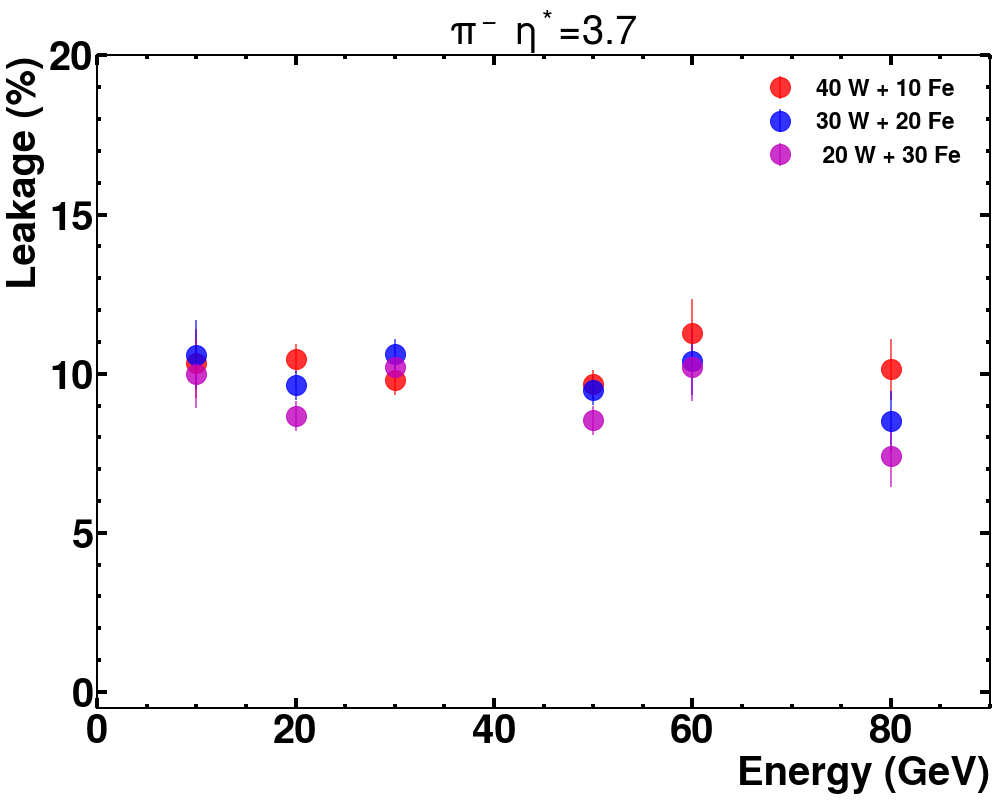

In [34]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_leaks_per_40W_10Fe, pi_leaks_per_error_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,pi_leaks_per_30W_20Fe, pi_leaks_per_error_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )

ax.errorbar(energies_pi,pi_leaks_per_20W_30Fe, pi_leaks_per_error_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
            label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,pi_leaks_per_10W_40Fe, pi_leaks_per_error_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )

'''
ax.set_title('$\pi^-$ $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)
ax.set_xlim(0,90)

plt.legend()
plt.show()

## Leakage for electron

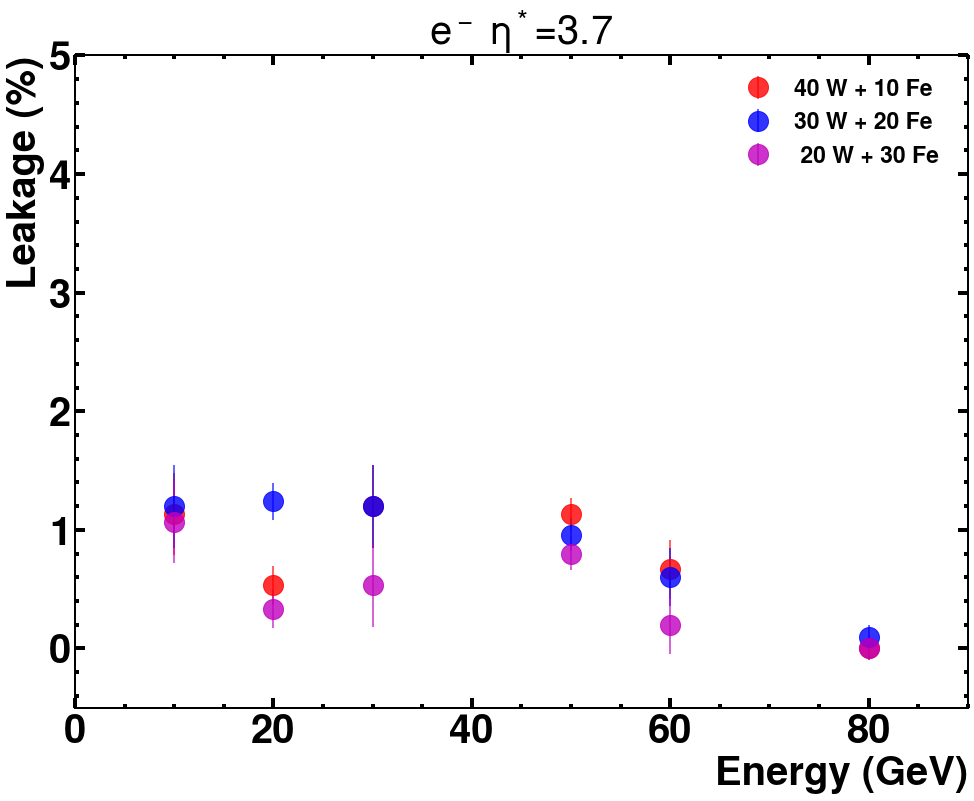

In [50]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,e_leaks_per_40W_10Fe, e_leaks_per_error_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,e_leaks_per_30W_20Fe, e_leaks_per_error_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )

ax.errorbar(energies_pi,e_leaks_per_20W_30Fe, e_leaks_per_error_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
            label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,pi_leaks_per_10W_40Fe, pi_leaks_per_error_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )

'''
ax.set_title('$e^-$ $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,5)
ax.set_xlim(0,90)

plt.legend()
plt.show()

## Resolution with different absorber thickness

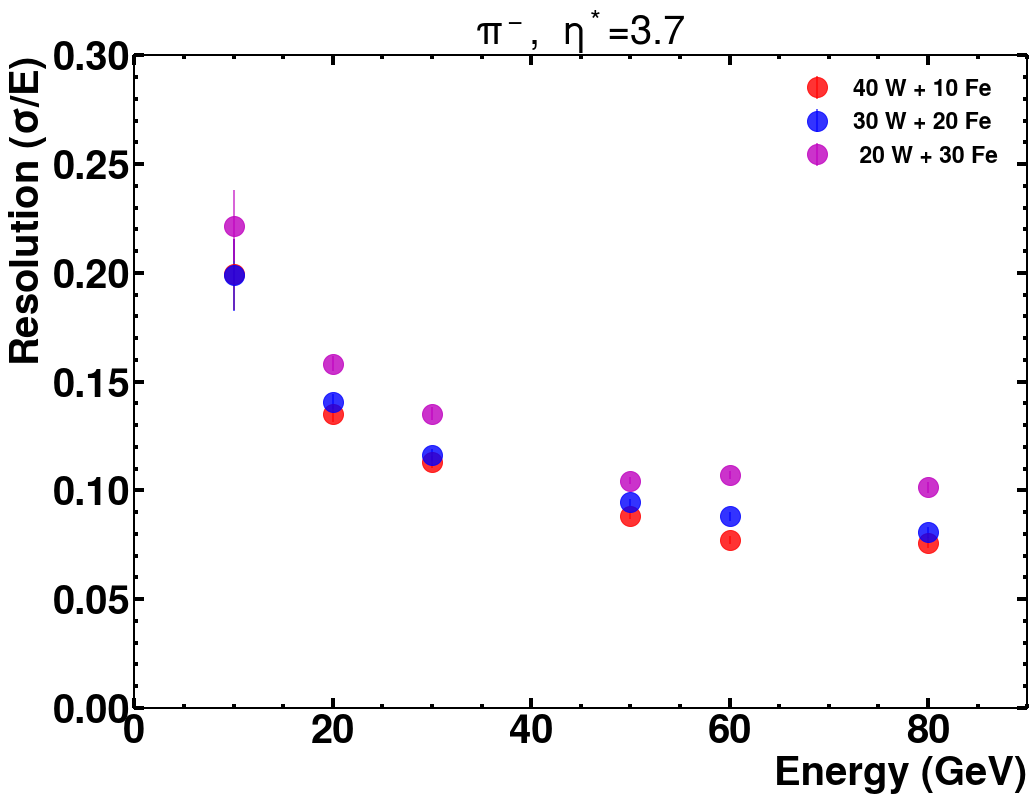

In [44]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_resolutions_40W_10Fe, pi_resolutions_errors_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,pi_resolutions_30W_20Fe, pi_resolutions_errors_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )




ax.errorbar(energies_pi,pi_resolutions_20W_30Fe, pi_resolutions_errors_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
            label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,pi_resolutions_10W_40Fe, pi_resolutions_errors_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )

'''
ax.set_title('$\pi^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Resolution ($\sigma$/E)")
ax.set_ylim(0,0.30)
ax.set_xlim(0,90)

plt.legend()
plt.show()

## Electron Resolution

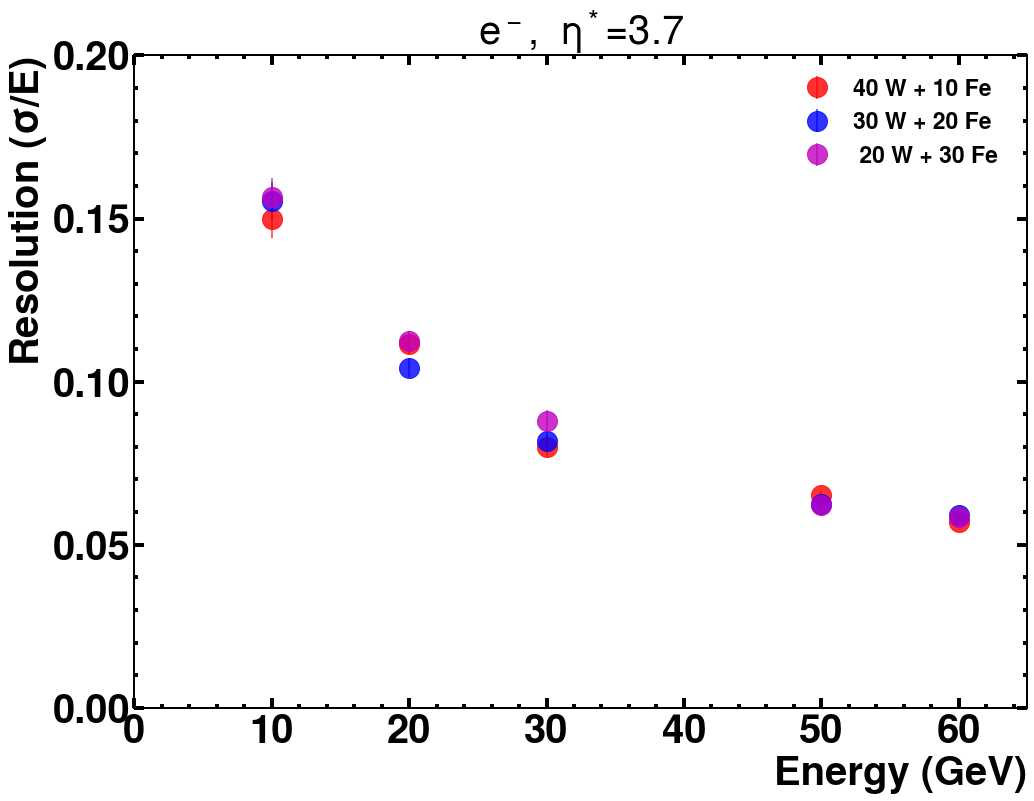

In [47]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,e_resolutions_40W_10Fe, e_resolutions_errors_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,e_resolutions_30W_20Fe, e_resolutions_errors_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )




ax.errorbar(energies_pi,e_resolutions_20W_30Fe, e_resolutions_errors_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
            label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,pi_resolutions_10W_40Fe, pi_resolutions_errors_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )

'''
ax.set_title('$e^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Resolution ($\sigma$/E)")
ax.set_ylim(0,0.20)
ax.set_xlim(0,65)
ax.yaxis.set_major_locator(MultipleLocator(0.05))

plt.legend()
plt.show()

## Mean energy for $\pi^-$ for constant eta at different energy

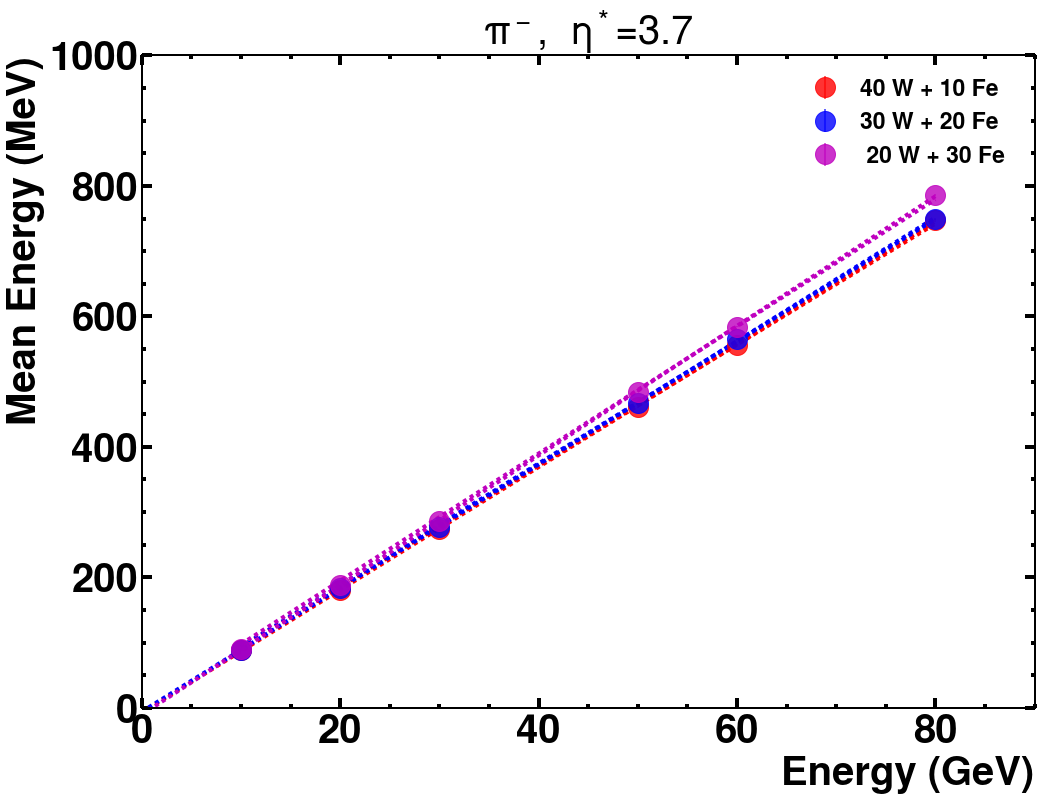

In [35]:
def fit_here(energies_pi, pi_means,col):
    popt,_popcov=curve_fit(plots.linear_fit,energies_pi,pi_means,p0=[0,25],bounds=(0,101))
    energies=np.asarray(energies_pi)
    ax.plot(energies_pi,plots.linear_fit(energies,*popt),color=col,linewidth='4', linestyle=(0,(1,1)))
    z = np.polyfit(energies, pi_means, 1)
    f = np.poly1d(z)
    ax.plot((0, max(energies)), (f(0), f(max(energies))),  color=col,linewidth='4', linestyle=(0,(1,1)))
    #plt.show()

import numpy as np
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_means_40W_10Fe, pi_means_error_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,pi_means_30W_20Fe, pi_means_error_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )




#ax.plot(energies_pi,plots.linear_fit(energies_pi,*popt_30W_20Fe),color='m',linewidth='4',\
#        linestyle='dashed')

ax.errorbar(energies_pi,pi_means_20W_30Fe, pi_means_error_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
 
        label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,pi_means_10W_40Fe, pi_means_error_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )
'''

ax.set_title('$\pi^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Mean Energy (MeV)")
ax.set_ylim(0,1000)
ax.set_xlim(0,90)

plt.legend()
fit_here(energies_pi,pi_means_40W_10Fe, 'r')
fit_here(energies_pi,pi_means_30W_20Fe, 'b')
fit_here(energies_pi,pi_means_20W_30Fe, 'm')
#fit_here(energies_pi,pi_means_10W_40Fe, 'cyan')


plt.show()

## Linearity for the Electron

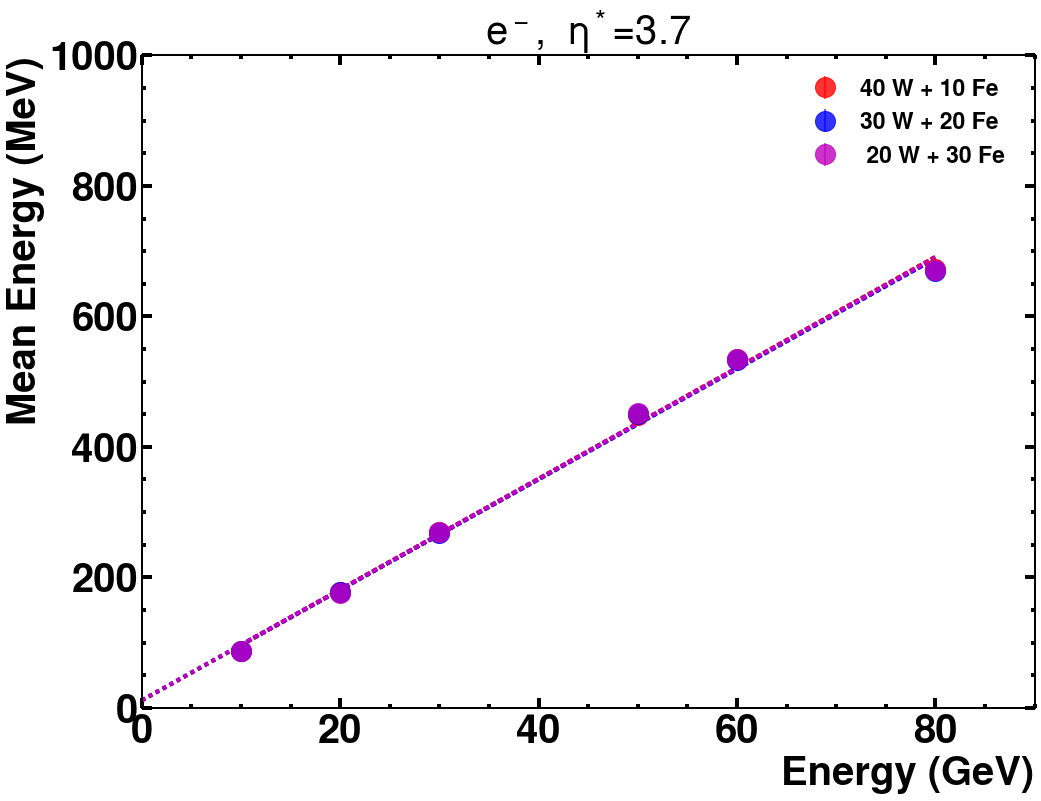

In [42]:
def fit_here(energies_e, e_means,col):
    popt,_popcov=curve_fit(plots.linear_fit,energies_e,e_means,p0=[0,25],bounds=(0,101))
    energies=np.asarray(energies_e)
    ax.plot(energies_e,plots.linear_fit(energies,*popt),color=col,linewidth='4', linestyle=(0,(1,1)))
    z = np.polyfit(energies, e_means, 1)
    f = np.poly1d(z)
    ax.plot((0, max(energies)), (f(0), f(max(energies))),  color=col,linewidth='4', linestyle=(0,(1,1)))
    #plt.show()

import numpy as np
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,e_means_40W_10Fe, e_means_error_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,e_means_30W_20Fe, e_means_error_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )




ax.errorbar(energies_pi,e_means_20W_30Fe, e_means_error_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
 
        label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,e_means_10W_40Fe, e_means_error_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )
'''

ax.set_title('$e^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Mean Energy (MeV)")
ax.set_ylim(0,1000)
ax.set_xlim(0,90)

plt.legend()
fit_here(energies_pi,e_means_40W_10Fe, 'r')
fit_here(energies_pi,e_means_30W_20Fe, 'b')
fit_here(energies_pi,e_means_20W_30Fe, 'm')
#fit_here(energies_e,e_means_10W_40Fe, 'cyan')


plt.show()

## eh ratio for different W + Fe Layers

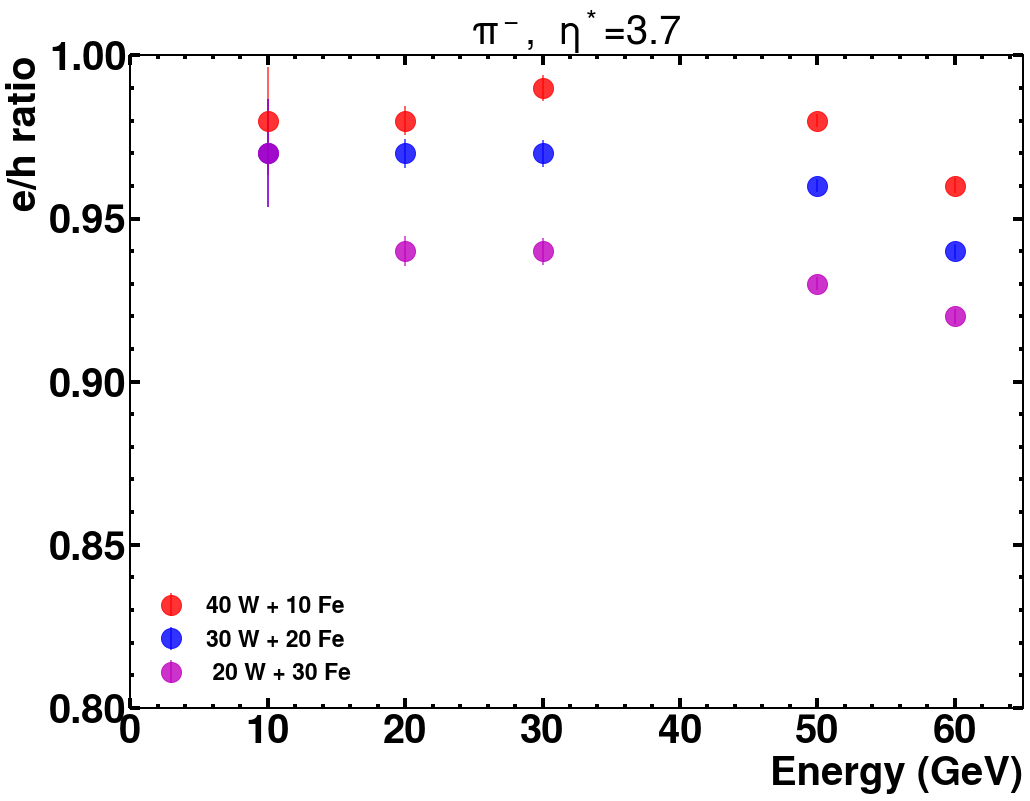

In [36]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,eh_ratio_40W_10Fe, eh_ratio_errors_30W_20Fe ,alpha=0.8,color="red",marker='o',markersize=20,\
            label='40 W + 10 Fe  ',linestyle='None')

ax.errorbar(energies_pi,eh_ratio_30W_20Fe, eh_ratio_errors_30W_20Fe,color="blue",alpha=0.8,marker='o',markersize=20,\
            label='30 W + 20 Fe',linestyle='None' )




ax.errorbar(energies_pi,eh_ratio_20W_30Fe, eh_ratio_errors_30W_20Fe ,alpha=0.8,color="m",marker='o',markersize=20,\
            label=' 20 W + 30 Fe',linestyle='None')
'''
ax.errorbar(energies_pi,eh_ratio_10W_40Fe, eh_ratio_errors_30W_20Fe,color="cyan",alpha=0.8,marker='o',markersize=20,\
            label='10 W + 40 Fe',linestyle='None' )
'''

ax.set_title('$\pi^-$,  $\eta^*$=3.7')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("e/h ratio")
ax.set_ylim(0.8,1.0)
ax.set_xlim(0,65)

ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.legend()
plt.show()